<h1><center>Master of Business Analytics Thesis <br>Feature Importance Study for HSE variables on board of rigs</center></h1>
<h2><center>Notebook: Models</center></h2>

## Table of Contents

* [Section 1](#section1): Dummy Variable Trap
* [Section 2](#section2): Split dataset into training and test
* [Section 3](#section3): Feature Scaling
    * [3.1](#3_1): Normalize
    * [3.2](#3_2): Standardization
* [Section 4](#section4): Linear Regression for all positions
    * [4.1](#4_1): Visualization linear relationship 
    * [4.2](#4_2): Formula
    * [4.3](#4_3): Model
    * [4.4](#4_4): Ridge Regression all positions
    * [4.5](#4_5): Lasso Regression all positions
* [Section 5](#section5): Linear Regression with Rig Managers data only
    * [5.1](#5_1): Visualization linear relationship 
    * [5.2](#5_2): Formula
    * [5.3](#5_3): Model
    * [5.4](#5_4): Ridge Regression Rig Managers only
    * [5.5](#5_5): Lasso Regression Rig Managers only
* [Section 6](#section6): Decision Tree Regressor for all positions 
    * [6.1](#6_1): Hyperparameter tuning
* [Section 7](#section7): Decision Tree Regressor with Rig Managers data only 
    * [7.1](#7_1): Hyperparameter tuning
* [Section 8](#section8): Random Forest Regressor for all positions
    * [8.1](#8_1): Hyperparameter tuning
* [Section 9](#section9): Random Forest Regressor with Rig Managers data only
    * [9.1](#9_1): Hyperparameter tuning
* [Section 10](#section10): XGBoost Regressor for all positions
    * [10.1](#10_1): Hyperparameter tuning
* [Section 11](#section11): XGBoost Regressor with Rig Managers data only
    * [11.1](#11_1): Hyperparameter tuning
* [Section 12](#section12): Voting Regressor for all positions
* [Section 13](#section13): Voting Regressor with Rig Managers data only
    

In [221]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("darkgrid")
sns.set_style("whitegrid")
import plotly.io as pio
import plotly.graph_objects as go
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#printing all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")


In [222]:
#Importing cleaned datasets
df = pd.read_csv("./Datasets/Pre_processing_done.csv", index_col = 0)
df

df_baseline =  pd.read_csv("./Datasets/Pre_processing_done.csv", index_col = 0)


df_rm = pd.read_csv("./Datasets/Pre_processing_RM_done.csv", index_col = 0)
df_rm

df_rm_baseline = pd.read_csv("./Datasets/Pre_processing_RM_done.csv", index_col = 0)



,year,month_year,Total_WorkingDays_120d,Evaluation_Only__percentage_120d,First_Aid_Incident_percentage_120d,Medical_Treatment_Only_percentage_120d,No_IADC_Injury_Classification_percentage_120d,Restricted_Work_Incident__percentage_120d,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Medium_risk_percentage_120d,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,16506.0,0.0,1.000000,0.00,0.0,0.000000,-0.706365,0.445779,0.559251,0.023183,0.894161,0.082656,0.039324,0.039866,0.052757,0.928610,0.463763,0.060584
7,2021,2021-05,16512.0,0.0,0.000000,0.00,0.0,0.000000,-0.469006,0.541805,0.927386,0.019722,0.909489,0.070790,0.038529,0.038268,0.048847,0.931561,0.454385,0.000000
8,2021,2021-06,17206.0,0.0,1.000000,0.00,0.0,0.000000,-0.185492,0.582899,1.077647,0.018283,0.909071,0.072646,0.038238,0.042552,0.049078,0.927893,0.443534,0.058119
9,2021,2021-07,16726.0,0.0,1.000000,0.00,0.0,0.000000,-0.003215,0.540605,1.084659,0.024198,0.899515,0.076287,0.048010,0.052751,0.054790,0.922500,0.425973,0.059787
10,2021,2021-08,16384.0,0.0,1.000000,0.00,0.0,0.000000,-0.001977,0.511881,1.114380,0.063862,0.828404,0.107734,0.171486,0.142458,0.135283,0.822653,0.416968,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.0,1.000000,0.00,0.0,0.000000,-0.135877,0.700201,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,0.071229,0.897554,0.560073,0.484825
342,2021,2021-12,10521.0,0.0,0.833333,0.00,0.0,0.166667,-0.160332,0.690719,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,0.081323,0.875450,0.565659,0.570288
343,2022,2022-01,9172.0,0.0,0.800000,0.00,0.0,0.200000,-0.214469,0.746363,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,0.092667,0.849189,0.555354,0.545137
344,2022,2022-02,8609.0,0.0,0.800000,0.00,0.0,0.200000,-0.245051,0.715332,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,0.102015,0.836975,0.593927,0.580788


,year,month_year,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,94.0,-0.408140,0.915723,0.893617,0.000000,0.535714,0.464286,0.035714,0.047619,0.047619,0.904762,0.952381,0.060584
7,2021,2021-05,93.0,-0.044404,0.973751,1.247312,0.000000,0.663793,0.336207,0.034483,0.043103,0.034483,0.913793,0.956897,0.000000
8,2021,2021-06,92.0,0.067696,0.851494,1.250000,0.000000,0.791304,0.208696,0.034783,0.043478,0.026087,0.930435,0.956522,0.058119
9,2021,2021-07,93.0,0.286694,0.787907,0.989247,0.000000,0.934783,0.065217,0.032609,0.010870,0.000000,0.967391,0.989130,0.059787
10,2021,2021-08,95.0,0.066898,0.697825,0.936842,0.056180,0.865169,0.078652,0.112360,0.101124,0.044944,0.887640,0.966292,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,92.0,0.280273,0.568201,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692,0.484825
342,2021,2021-12,91.0,-0.050063,0.501254,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952,0.570288
343,2022,2022-01,93.0,-0.680549,0.714228,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085,0.545137
344,2022,2022-02,93.0,-0.573805,0.829101,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429,0.580788


## Dummy Variable Trap <a class="anchor" id="section1"></a> 
To avoid dummy variable trap, we need to drop one of the three columns for the risk percentages.

In [223]:
df.columns.tolist()
df_rm.columns.tolist()

['year',
 'month_year',
 'Total_WorkingDays_120d',
 'Evaluation_Only__percentage_120d',
 'First_Aid_Incident_percentage_120d',
 'Medical_Treatment_Only_percentage_120d',
 'No_IADC_Injury_Classification_percentage_120d',
 'Restricted_Work_Incident__percentage_120d',
 'Alpha',
 'Beta',
 'Report_per_Day',
 'High_risk_percentage_120d',
 'Low_risk_percentage_120d',
 'Medium_risk_percentage_120d',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'Incidents_per_1000']

['year',
 'month_year',
 'RM_Total_WorkingDays_120d',
 'RM_Alpha',
 'RM_Beta',
 'RM_Report_per_Day',
 'RM_High_risk_percentage_120d',
 'RM_Low_risk_percentage_120d',
 'RM_Medium_risk_percentage_120d',
 'RM_Unsafe_Actions_percentage_120d',
 'RM_Unsafe_Condition_percentage_120d',
 'RM_Unsafe_Condition_Corrected_percentage_120d',
 'RM_Positive_Observation_percentage_120d',
 'RM_Action_Taken_percentage_120d',
 'Incidents_per_1000']

In [224]:
df = df.drop(columns={"Medium_risk_percentage_120d"
                     })

df_rm = df_rm.drop(columns={'RM_Medium_risk_percentage_120d'})




After running the models, some columns need to be dropped as they have very small significance or they seem to be correlated with other columns.

In [225]:
df.columns.tolist()

['year',
 'month_year',
 'Total_WorkingDays_120d',
 'Evaluation_Only__percentage_120d',
 'First_Aid_Incident_percentage_120d',
 'Medical_Treatment_Only_percentage_120d',
 'No_IADC_Injury_Classification_percentage_120d',
 'Restricted_Work_Incident__percentage_120d',
 'Alpha',
 'Beta',
 'Report_per_Day',
 'High_risk_percentage_120d',
 'Low_risk_percentage_120d',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'Incidents_per_1000']

In [226]:
# df = df.drop(columns={'Total_WorkingDays_120d',
#                       'Positive_Observation_percentage_120d',
#                       'Evaluation_Only__percentage_120d',
#                       'First_Aid_Incident_percentage_120d',
#                       'Medical_Treatment_Only_percentage_120d',
#                       'Restricted_Work_Incident__percentage_120d',
#                       'Unsafe_Condition_percentage_120d',
#                       'Unsafe_Condition_Corrected_percentage_120d',
#                       'No_IADC_Injury_Classification_percentage_120d',
#                        'Alpha', "Unsafe_Actions_percentage_120d"
#                       })

df = df.drop(columns={'Total_WorkingDays_120d',
                      'Positive_Observation_percentage_120d',
                      'Evaluation_Only__percentage_120d',
                      'First_Aid_Incident_percentage_120d',
                      'Medical_Treatment_Only_percentage_120d',
                      'Restricted_Work_Incident__percentage_120d',
                      'No_IADC_Injury_Classification_percentage_120d',
                      'Unsafe_Condition_percentage_120d',
                      'Unsafe_Actions_percentage_120d'
                      })

# df_rm = df_rm.drop(columns={'RM_Positive_Observation_percentage_120d',
#                             'RM_Unsafe_Condition_percentage_120d',
#                            'RM_Beta', "RM_Report_per_Day"})

df_rm = df_rm.drop(columns={'RM_Positive_Observation_percentage_120d',
                           'RM_Unsafe_Condition_percentage_120d',"RM_Report_per_Day"})

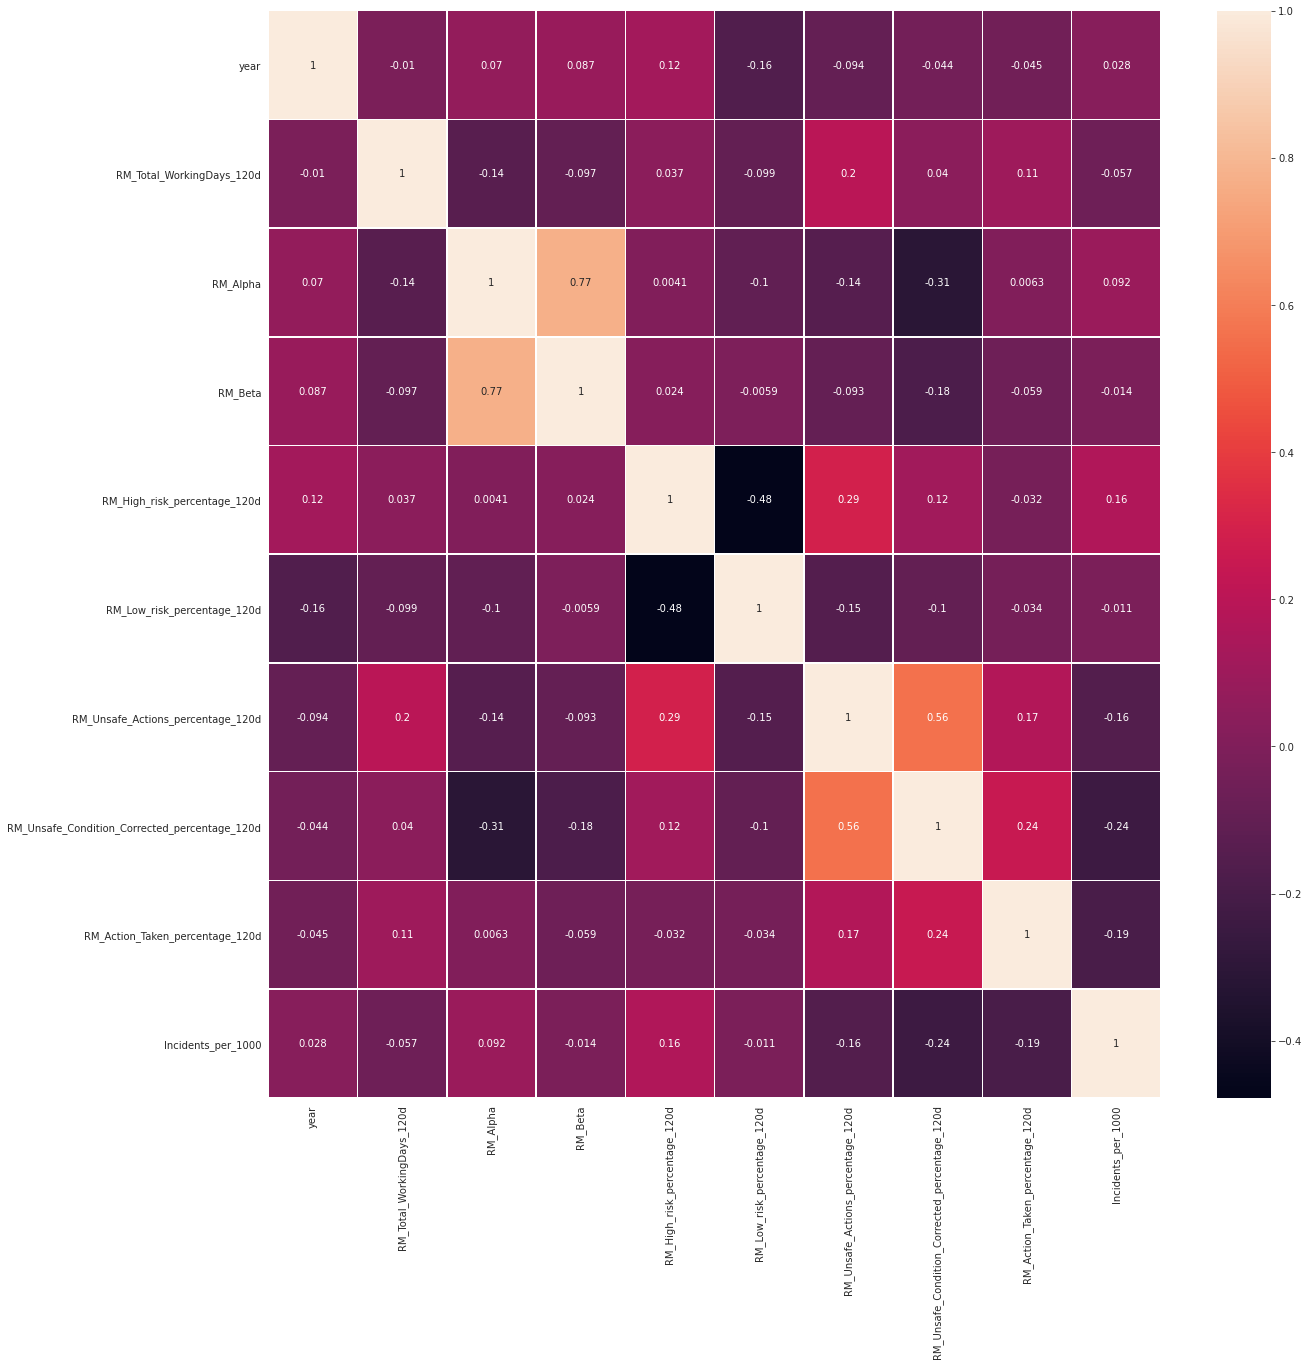

In [227]:
corrMatrix = df_rm.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show();

## Split dataset into training and test <a class="anchor" id="section2"></a> 

In [228]:
df = df.sort_values("month_year").reset_index(drop=True)
df['month_year'] = pd.to_datetime(df['month_year']).dt.month
df

df_rm = df_rm.sort_values("month_year").reset_index(drop=True)
df_rm['month_year'] = pd.to_datetime(df_rm['month_year']).dt.month
df_rm

,year,month_year,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
0,2021,1,-1.403011,0.300586,0.091725,0.024476,0.797203,0.265734,0.468531,0.320718
1,2021,1,-1.456854,0.117331,0.099483,0.044917,0.650118,0.075650,0.557920,0.470367
2,2021,1,-1.527818,0.034305,0.163014,0.029475,0.798706,0.253774,0.641265,0.000000
3,2021,1,-0.888678,0.585522,0.624740,0.015807,0.793677,0.138935,0.420133,0.000000
4,2021,1,-1.429726,0.187718,0.288423,0.053201,0.728806,0.173010,0.628028,0.374251
...,...,...,...,...,...,...,...,...,...,...
257,2022,3,-0.916946,0.352403,0.261533,0.058798,0.643678,0.267905,0.497790,0.231241
258,2022,3,-0.871201,0.372203,0.396845,0.041495,0.710841,0.086900,0.793178,0.000000
259,2022,3,-0.662724,0.524007,0.479489,0.046613,0.735235,0.052837,0.760567,0.208232
260,2022,3,0.092534,0.511203,1.070181,0.049375,0.732913,0.082842,0.466651,0.000000


,year,month_year,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
0,2021,1,92.0,-0.559222,1.186703,0.000000,0.924528,0.037736,0.037736,0.188679,0.087313
1,2021,1,92.0,-1.255597,0.793508,0.000000,0.750000,0.125000,0.937500,1.000000,0.320718
2,2021,1,91.0,-0.929735,0.449673,0.000000,0.344828,0.137931,0.068966,0.931034,0.092064
3,2021,1,92.0,1.090335,2.809326,0.000000,0.714286,0.092857,0.057143,0.571429,0.000000
4,2021,1,97.0,-1.388513,0.515531,0.000000,0.846154,0.230769,0.230769,0.923077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
223,2022,3,88.0,-0.113208,0.857142,0.000000,0.236559,0.000000,0.000000,1.000000,0.791139
224,2022,3,90.0,-0.318001,0.735178,0.000000,0.791045,0.029851,0.089552,0.895522,0.212404
225,2022,3,90.0,1.007993,1.603436,0.013333,0.446667,0.066667,0.120000,0.346667,0.000000
226,2022,3,90.0,0.120128,0.838944,0.000000,0.988889,0.055556,0.055556,0.777778,0.324535


In [229]:
#After a first trial, these columns don't give any importance to the models
df = df.drop(columns={"year","month_year"})
df_rm = df_rm.drop(columns={"year","month_year"})

In [230]:
# train set is for 12 months where test set is for 3 months
test_size = 53

df_train = df[:-test_size]
df_test = df[-test_size:]

df_rm_train = df_rm[:-test_size]
df_rm_test = df_rm[-test_size:]


df_train
df_test
df_rm_train
df_rm_test

# the label for this model will be Incidents_per_1000
x_train = df_train.drop(columns=["Incidents_per_1000"])
y_train = df_train["Incidents_per_1000"].copy()
x_test = df_test.drop(columns=["Incidents_per_1000"])
y_test = df_test["Incidents_per_1000"].copy()

x_train_rm = df_rm_train.drop(columns=["Incidents_per_1000"])
y_train_rm = df_rm_train["Incidents_per_1000"].copy()
x_test_rm = df_rm_test.drop(columns=["Incidents_per_1000"])
y_test_rm = df_rm_test["Incidents_per_1000"].copy()



,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
0,-1.403011,0.300586,0.091725,0.024476,0.797203,0.265734,0.468531,0.320718
1,-1.456854,0.117331,0.099483,0.044917,0.650118,0.075650,0.557920,0.470367
2,-1.527818,0.034305,0.163014,0.029475,0.798706,0.253774,0.641265,0.000000
3,-0.888678,0.585522,0.624740,0.015807,0.793677,0.138935,0.420133,0.000000
4,-1.429726,0.187718,0.288423,0.053201,0.728806,0.173010,0.628028,0.374251
...,...,...,...,...,...,...,...,...
204,0.043056,0.597819,1.133161,0.029820,0.855993,0.062237,0.447867,0.235474
205,-0.751901,0.432172,0.444146,0.009674,0.850060,0.191052,0.640871,0.000000
206,-0.512030,0.678843,0.902660,0.017701,0.827646,0.050658,0.333877,0.105119
207,-0.429756,0.504126,0.904744,0.086795,0.631020,0.073272,0.282531,0.436954


,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
209,-0.227207,0.565060,1.011156,0.083262,0.670060,0.069243,0.289772,0.246533
210,-0.189772,0.482005,1.010965,0.018077,0.723568,0.707055,0.894860,0.000000
211,-0.256166,0.609864,0.790835,0.047686,0.685465,0.076253,0.348195,0.175131
212,-0.214469,0.746363,0.840057,0.021804,0.844776,0.092667,0.555354,0.545137
213,-0.603588,0.565124,0.594713,0.037323,0.753956,0.051214,0.783186,0.287336
214,-0.358933,0.786691,0.974822,0.019622,0.828311,0.056062,0.345280,0.097590
215,-0.893250,0.354995,0.284850,0.045291,0.666132,0.277756,0.498998,0.342505
216,-0.761971,0.426951,0.427714,0.006378,0.853316,0.218112,0.609694,0.000000
217,-0.978112,0.266449,0.150963,0.044657,0.601276,0.188729,0.813397,0.160514
218,-0.313452,0.648577,1.047799,0.032182,0.659214,0.174571,0.650294,0.118315


,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
0,92.0,-0.559222,1.186703,0.000000,0.924528,0.037736,0.037736,0.188679,0.087313
1,92.0,-1.255597,0.793508,0.000000,0.750000,0.125000,0.937500,1.000000,0.320718
2,91.0,-0.929735,0.449673,0.000000,0.344828,0.137931,0.068966,0.931034,0.092064
3,92.0,1.090335,2.809326,0.000000,0.714286,0.092857,0.057143,0.571429,0.000000
4,97.0,-1.388513,0.515531,0.000000,0.846154,0.230769,0.230769,0.923077,0.000000
...,...,...,...,...,...,...,...,...,...
170,91.0,-0.521742,0.631299,0.000000,0.977778,0.000000,0.000000,0.644444,0.380199
171,91.0,-0.032571,1.241039,0.000000,0.397260,0.027397,0.082192,1.000000,0.143205
172,91.0,-0.028839,0.801686,0.000000,1.000000,0.058824,0.094118,0.976471,0.415541
173,91.0,-0.050063,0.501254,0.142857,0.174603,0.317460,0.333333,0.380952,0.570288


,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
175,101.0,-0.229555,1.037682,0.048387,0.403226,0.112903,0.258065,0.370968,0.288517
176,85.0,-0.714205,0.424717,0.000000,0.673913,0.021739,0.065217,0.173913,0.967212
177,92.0,-0.792213,0.687631,0.000000,0.666667,0.125000,0.750000,0.875000,0.342505
178,92.0,0.108067,0.817778,0.000000,1.000000,0.065217,0.086957,0.869565,0.432760
179,92.0,-0.102528,0.564969,0.027397,0.054795,0.109589,0.479452,0.753425,0.175131
180,92.0,0.353251,1.208786,0.000000,0.907407,0.157407,0.407407,0.601852,0.118315
181,79.0,-0.490717,0.797875,0.000000,1.000000,0.162162,0.324324,1.000000,0.000000
182,92.0,-0.501644,0.598472,0.000000,0.896552,0.034483,0.155172,0.724138,0.348724
183,92.0,0.851786,1.570765,0.007042,0.528169,0.084507,0.126761,0.521127,0.452967
184,92.0,0.311779,1.380739,0.024390,0.829268,0.081301,0.219512,0.577236,0.097590


Now that the test and train sets are there, we need to split them into data and label. The label is our y value which will only contain the number of events as this is what we want to predict. The data is our x values which are all the other attributes.


In [231]:
# Dataset including all positions variables
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(x_train)))
print('Testing Observations: %d' % (len(x_test)))

print(len(df_train), "train +", len(df_test), "test")

x_train 
x_test
y_train
y_test

#Dataset including Rig Managers variables
print('Training dataset shape:', x_train_rm.shape, y_train_rm.shape)
print('Testing dataset shape:', x_test_rm.shape, y_test_rm.shape)
print('Observations: %d' % (len(df_rm)))
print('Training Observations: %d' % (len(x_train_rm)))
print('Testing Observations: %d' % (len(x_test_rm)))

print(len(df_rm_train), "train +", len(df_rm_test), "test")

x_train_rm 
x_test_rm
y_train_rm
y_test_rm


Training dataset shape: (209, 7) (209,)
Testing dataset shape: (53, 7) (53,)
Observations: 262
Training Observations: 209
Testing Observations: 53
209 train + 53 test


,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Action_Taken_percentage_120d
0,-1.403011,0.300586,0.091725,0.024476,0.797203,0.265734,0.468531
1,-1.456854,0.117331,0.099483,0.044917,0.650118,0.075650,0.557920
2,-1.527818,0.034305,0.163014,0.029475,0.798706,0.253774,0.641265
3,-0.888678,0.585522,0.624740,0.015807,0.793677,0.138935,0.420133
4,-1.429726,0.187718,0.288423,0.053201,0.728806,0.173010,0.628028
...,...,...,...,...,...,...,...
204,0.043056,0.597819,1.133161,0.029820,0.855993,0.062237,0.447867
205,-0.751901,0.432172,0.444146,0.009674,0.850060,0.191052,0.640871
206,-0.512030,0.678843,0.902660,0.017701,0.827646,0.050658,0.333877
207,-0.429756,0.504126,0.904744,0.086795,0.631020,0.073272,0.282531


,Alpha,Beta,Report_per_Day,High_risk_percentage_120d,Low_risk_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Action_Taken_percentage_120d
209,-0.227207,0.565060,1.011156,0.083262,0.670060,0.069243,0.289772
210,-0.189772,0.482005,1.010965,0.018077,0.723568,0.707055,0.894860
211,-0.256166,0.609864,0.790835,0.047686,0.685465,0.076253,0.348195
212,-0.214469,0.746363,0.840057,0.021804,0.844776,0.092667,0.555354
213,-0.603588,0.565124,0.594713,0.037323,0.753956,0.051214,0.783186
214,-0.358933,0.786691,0.974822,0.019622,0.828311,0.056062,0.345280
215,-0.893250,0.354995,0.284850,0.045291,0.666132,0.277756,0.498998
216,-0.761971,0.426951,0.427714,0.006378,0.853316,0.218112,0.609694
217,-0.978112,0.266449,0.150963,0.044657,0.601276,0.188729,0.813397
218,-0.313452,0.648577,1.047799,0.032182,0.659214,0.174571,0.650294


0      0.320718
1      0.470367
2      0.000000
3      0.000000
4      0.374251
         ...   
204    0.235474
205    0.000000
206    0.105119
207    0.436954
208    0.143205
Name: Incidents_per_1000, Length: 209, dtype: float64

209    0.246533
210    0.000000
211    0.175131
212    0.545137
213    0.287336
214    0.097590
215    0.342505
216    0.000000
217    0.160514
218    0.118315
219    0.058326
220    0.288517
221    0.432760
222    0.348724
223    0.967212
224    0.487567
225    0.452967
226    0.000000
227    0.341997
228    0.000000
229    0.062976
230    0.094331
231    0.350484
232    0.086415
233    0.000000
234    0.178902
235    0.580788
236    1.077296
237    0.336852
238    0.158265
239    0.151035
240    0.585594
241    0.173521
242    0.000000
243    0.552853
244    0.189119
245    0.000000
246    0.000000
247    0.167983
248    0.791139
249    0.130480
250    0.212404
251    0.108566
252    0.324535
253    0.099325
254    0.000000
255    0.157394
256    0.000000
257    0.231241
258    0.000000
259    0.208232
260    0.000000
261    0.520562
Name: Incidents_per_1000, dtype: float64

Training dataset shape: (175, 8) (175,)
Testing dataset shape: (53, 8) (53,)
Observations: 228
Training Observations: 175
Testing Observations: 53
175 train + 53 test


,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Action_Taken_percentage_120d
0,92.0,-0.559222,1.186703,0.000000,0.924528,0.037736,0.037736,0.188679
1,92.0,-1.255597,0.793508,0.000000,0.750000,0.125000,0.937500,1.000000
2,91.0,-0.929735,0.449673,0.000000,0.344828,0.137931,0.068966,0.931034
3,92.0,1.090335,2.809326,0.000000,0.714286,0.092857,0.057143,0.571429
4,97.0,-1.388513,0.515531,0.000000,0.846154,0.230769,0.230769,0.923077
...,...,...,...,...,...,...,...,...
170,91.0,-0.521742,0.631299,0.000000,0.977778,0.000000,0.000000,0.644444
171,91.0,-0.032571,1.241039,0.000000,0.397260,0.027397,0.082192,1.000000
172,91.0,-0.028839,0.801686,0.000000,1.000000,0.058824,0.094118,0.976471
173,91.0,-0.050063,0.501254,0.142857,0.174603,0.317460,0.333333,0.380952


,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Action_Taken_percentage_120d
175,101.0,-0.229555,1.037682,0.048387,0.403226,0.112903,0.258065,0.370968
176,85.0,-0.714205,0.424717,0.000000,0.673913,0.021739,0.065217,0.173913
177,92.0,-0.792213,0.687631,0.000000,0.666667,0.125000,0.750000,0.875000
178,92.0,0.108067,0.817778,0.000000,1.000000,0.065217,0.086957,0.869565
179,92.0,-0.102528,0.564969,0.027397,0.054795,0.109589,0.479452,0.753425
180,92.0,0.353251,1.208786,0.000000,0.907407,0.157407,0.407407,0.601852
181,79.0,-0.490717,0.797875,0.000000,1.000000,0.162162,0.324324,1.000000
182,92.0,-0.501644,0.598472,0.000000,0.896552,0.034483,0.155172,0.724138
183,92.0,0.851786,1.570765,0.007042,0.528169,0.084507,0.126761,0.521127
184,92.0,0.311779,1.380739,0.024390,0.829268,0.081301,0.219512,0.577236


0      0.087313
1      0.320718
2      0.092064
3      0.000000
4      0.000000
         ...   
170    0.380199
171    0.143205
172    0.415541
173    0.570288
174    0.116973
Name: Incidents_per_1000, Length: 175, dtype: float64

175    0.288517
176    0.967212
177    0.342505
178    0.432760
179    0.175131
180    0.118315
181    0.000000
182    0.348724
183    0.452967
184    0.097590
185    0.000000
186    0.287336
187    0.487567
188    0.545137
189    0.058326
190    0.246533
191    0.160514
192    0.062976
193    0.341997
194    0.094331
195    0.336852
196    0.158265
197    0.151035
198    0.000000
199    0.086415
200    0.580788
201    0.585594
202    0.000000
203    0.178902
204    1.077296
205    0.000000
206    0.350484
207    0.173521
208    0.000000
209    0.552853
210    0.189119
211    0.000000
212    0.000000
213    0.157394
214    0.000000
215    0.108566
216    0.130480
217    0.231241
218    0.167983
219    0.000000
220    0.208232
221    0.099325
222    0.000000
223    0.791139
224    0.212404
225    0.000000
226    0.324535
227    0.520562
Name: Incidents_per_1000, dtype: float64

## Feature Scaling <a class="anchor" id="section3"></a>

### Normalize <a class="anchor" id="3_1"></a>

In [232]:
from functions import normalize_func
normalize_func(x_train,x_test)
normalize_func(x_train_rm,x_test_rm)

### Values Log

In [233]:
# x_train_columns = x_train.columns.tolist()
# x_train = np.log(x_train[x_train_columns])
# x_train




### Standardization <a class="anchor" id="3_2"></a>

In [234]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

x_train_columns = x_train.columns.tolist()
x_test_columns = x_test.columns.tolist()
x_train_rm_columns = x_train_rm.columns.tolist()
x_test_rm_columns = x_test_rm.columns.tolist()

x_train[x_train_columns] = std_scaler.fit_transform(x_train[x_train_columns])
x_test[x_test_columns] = std_scaler.transform(x_test[x_test_columns])

x_train_rm[x_train_rm_columns] = std_scaler.fit_transform(x_train_rm[x_train_rm_columns])
x_test_rm[x_test_rm_columns] = std_scaler.transform(x_test_rm[x_test_rm_columns])



Saving figure bar_plot1


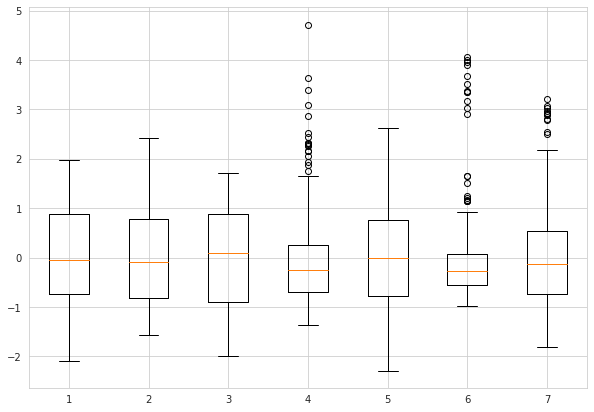

Saving figure bar_plot_rm


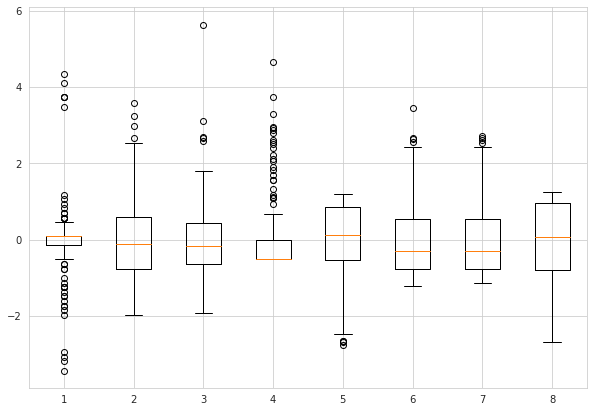

In [350]:
from functions import bar_plot
bar_plot(x_train, "bar_plot1")
bar_plot(x_train_rm, "bar_plot_rm")

In [236]:
# nat = df[[ "Unsafe_Actions_percentage_120d","Low_risk_percentage_120d","Action_Taken_percentage_120d","Incidents_per_1000"]]

# from matplotlib.patches import Rectangle

# corrMatrix = nat.corr()
# plt.figure(figsize=(4, 4))
# ax = sns.heatmap(corrMatrix, annot=True, linewidths=.4, vmin=-1, vmax=1)

# coordinates = [(3, 0), (3,1)]
# for coordinate in coordinates:
#     ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "green", lw = 3))
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks([-1.0, 0, 1.0])
# plt.tick_params(bottom = False, left = False)

# coordinates_n = [(3,2)]
# for coordinate in coordinates_n:
#     ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "red", lw = 3))
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks([-1.0, 0, 1.0])
# plt.tick_params(bottom = False, left = False)

# plt.show();


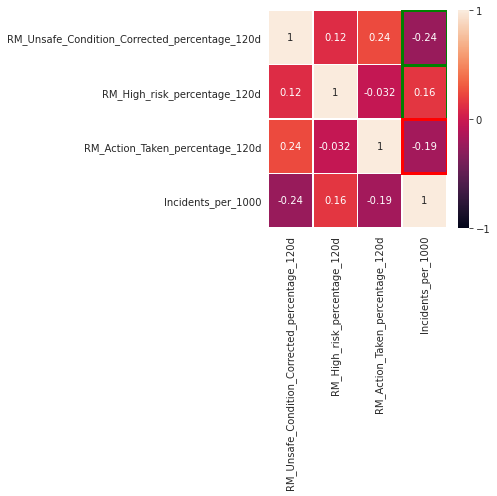

In [237]:
nat = df_rm[["RM_Unsafe_Condition_Corrected_percentage_120d", "RM_High_risk_percentage_120d","RM_Action_Taken_percentage_120d","Incidents_per_1000"]]

from matplotlib.patches import Rectangle

corrMatrix = nat.corr()
plt.figure(figsize=(4, 4))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.4, vmin=-1, vmax=1)

coordinates = [(3, 0), (3,1)]
for coordinate in coordinates:
    ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "green", lw = 3))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1.0, 0, 1.0])
plt.tick_params(bottom = False, left = False)

coordinates_n = [(3,2)]
for coordinate in coordinates_n:
    ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "red", lw = 3))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1.0, 0, 1.0])
plt.tick_params(bottom = False, left = False)

plt.show();


## Linear Regression for all positions <a class="anchor" id="section4"></a>

### Visualization linear relationship <a class="anchor" id="4_1"></a>

In [238]:
from functions import scatter_plot
#scatter_plot(df,'First_Aid_Incident_percentage_120d','Incidents_per_1000')


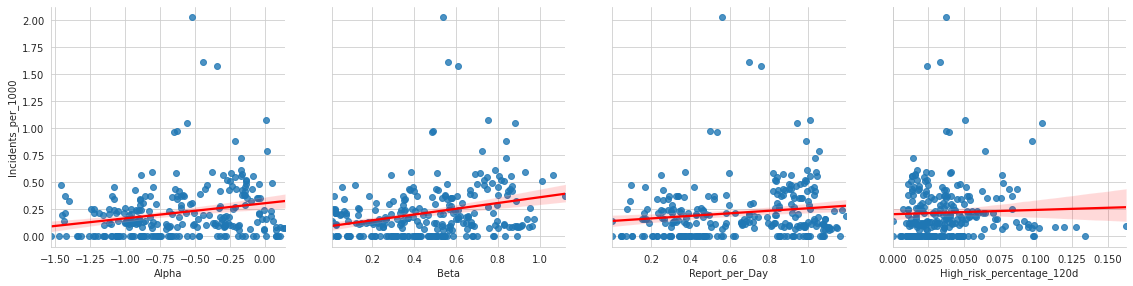

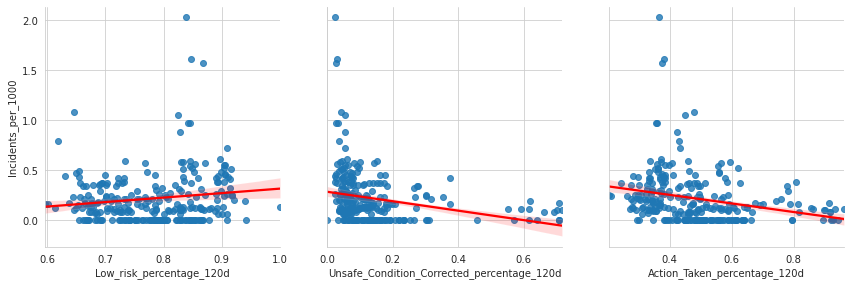

In [239]:
from functions import pairplot
pairplot(x_train, df, 0, 4)
pairplot(x_train, df, 4, 8)
#pairplot(x_train, df, 8, 12)
#pairplot(x_train, df, 12, 14)


### Formula <a class="anchor" id="4_2"></a>

Dependent_Variable (Y_i) = intercept +  independent variable  + random error term
Incidents_per_100 = add all independent variable 

y = b_0 + b_1*x_1 + b2*x2 + ...

### Model <a class="anchor" id="4_3"></a>

LinearRegression()

 Feature 0: Alpha,
 Score: 0.0293
 Feature 1: Beta,
 Score: 0.06541
 Feature 2: Report_per_Day,
 Score: -0.02413
 Feature 3: High_risk_percentage_120d,
 Score: -0.0092
 Feature 4: Low_risk_percentage_120d,
 Score: 0.03241
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.03675
 Feature 6: Action_Taken_percentage_120d,
 Score: -0.08331


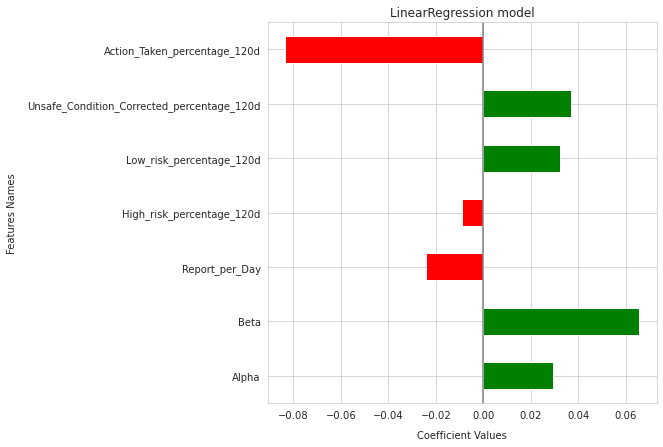

R-squared: -6.465 %
Mean Absolute Error (MAE): 0.198
Mean Squared Error (MSE): 0.064
Root Mean Squared Error (RMSE): 0.253


In [240]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#this is to import the function from the functions.py file
from functions import feature_importance

# define the model
linreg = LinearRegression()

# fit the model
linreg.fit(x_train, y_train)

#get intercept
intercept = linreg.intercept_

#feature importance
feature_importance(linreg,x_train)

#model predictions
pred_linreg = linreg.predict(x_test)

#model evaluation
r2_score_linreg = linreg.score(x_test,y_test)
print("R-squared:",round(r2_score_linreg*100,3),'%')
MAE_linreg =  round(mean_absolute_error(y_test,pred_linreg),3)
print("Mean Absolute Error (MAE):",MAE_linreg)
MSE_linreg = round(mean_squared_error(y_test,pred_linreg),3)
print("Mean Squared Error (MSE):",MSE_linreg )
RMSE_linreg = round(np.sqrt(mean_squared_error(y_test,pred_linreg)),3)
# sqrt(mean(absolute(scores)))
print("Root Mean Squared Error (RMSE):",RMSE_linreg)



In [241]:
import statsmodels.api as sm
vcvtype = 'nonrobust'

X = x_train

X = sm.add_constant(X)
Y = y_train

# Regression 
model = sm.OLS(Y, X.astype(float))
results = model.fit(cov_type=vcvtype)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Incidents_per_1000   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.100
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           2.37e-05
Time:                        18:19:31   Log-Likelihood:                -3.8057
No. Observations:                 209   AIC:                             23.61
Df Residuals:                     201   BIC:                             50.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [242]:
#import from functions.py file the specific function
from functions import adding_to_df

# empty dataframe to add all the evaluation values
df_evaluation_score = pd.DataFrame()

# Updating the Evaluation score table
df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'r2_score_linreg',r2_score_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'RMSE_linreg', RMSE_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'MAE_linreg',MAE_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'MSE_linreg',MSE_linreg)

df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000


**MAE:** The easiest to understand. Represents average error <br>
**MSE:** Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular. <br>
**RMSE:** Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model. <br>



### Ridge Regression all positions <a class="anchor" id="4_4"></a>

Ridge(alpha=0.01)

 Feature 0: Alpha,
 Score: 0.02929
 Feature 1: Beta,
 Score: 0.0654
 Feature 2: Report_per_Day,
 Score: -0.02412
 Feature 3: High_risk_percentage_120d,
 Score: -0.0092
 Feature 4: Low_risk_percentage_120d,
 Score: 0.0324
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.03673
 Feature 6: Action_Taken_percentage_120d,
 Score: -0.0833


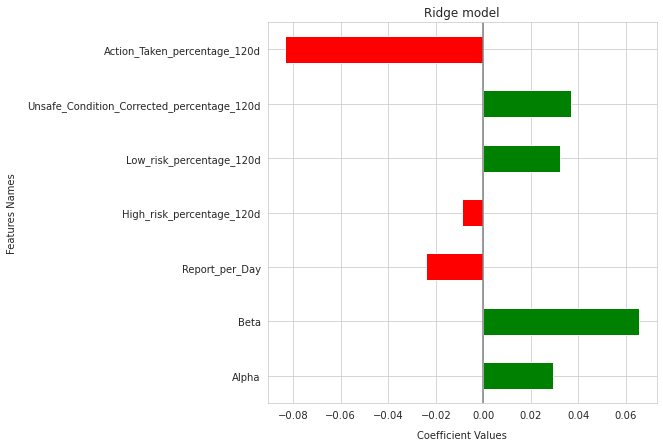

R-squared: -6.459 %
Root Mean Squared Error (RMSE): 0.253


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

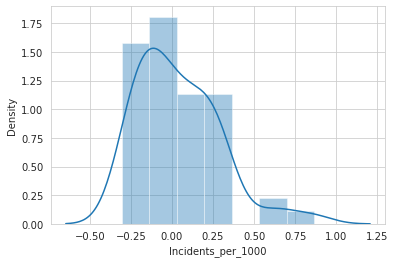

In [243]:
from sklearn.linear_model import Ridge

# define model
ridge = Ridge(alpha=0.01)

#fit the model
ridge.fit(x_train,y_train)

#feature importance
feature_importance(ridge,x_train)

#model prediction
pred_ridge = ridge.predict(x_test)

#model evaluation
r2_score_ridge = ridge.score(x_test,y_test)
print("R-squared:",round(r2_score_ridge*100,3),'%')

RMSE_ridge = round(np.sqrt(mean_squared_error(y_test,pred_ridge)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge)

sns.distplot(y_test-pred_ridge)



We are getting nearly bell shape curve that means our model working good? No we can't make that conclusion. Good bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

In [244]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression',
                                   'r2_score_ridge',r2_score_ridge)
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression',
                                   'RMSE_ridge',RMSE_ridge)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000


RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]), cv=5)

Alpha chosen by RidgeCV: 10.0
 Feature 0: Alpha,
 Score: 0.02487
 Feature 1: Beta,
 Score: 0.05714
 Feature 2: Report_per_Day,
 Score: -0.01504
 Feature 3: High_risk_percentage_120d,
 Score: -0.00899
 Feature 4: Low_risk_percentage_120d,
 Score: 0.0292
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.02237
 Feature 6: Action_Taken_percentage_120d,
 Score: -0.07154


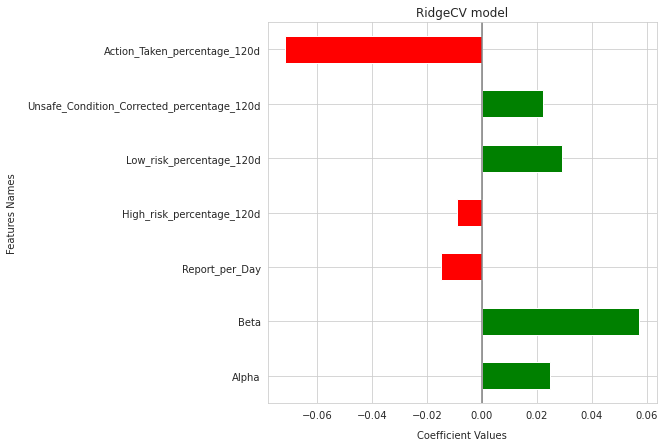

R-squared: -2.078 %
Root Mean Squared Error (RMSE): 0.248


In [245]:
#ridgeCV is cross validation method in ridge regression
from sklearn.linear_model import RidgeCV

#define the model 
ridge_cv = RidgeCV(alphas=[0.0001,0.001,0.01,1,10], cv=5)

#fit the model 
ridge_cv.fit(x_train,y_train)
print('Alpha chosen by RidgeCV:',ridge_cv.alpha_) 

#feature importance
feature_importance(ridge_cv,x_train)

#model prediction
pred_ridge_cv = ridge_cv.predict(x_test)

#model evaluation
r2_score_ridge_cv = ridge_cv.score(x_test,y_test)
print("R-squared:",round(r2_score_ridge_cv*100,3),'%')
RMSE_ridge_cv = round(np.sqrt(mean_squared_error(y_test,pred_ridge_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge_cv)


In [246]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression',
                                   'r2_score_ridge_cv',r2_score_ridge_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression',
                                   'RMSE_ridge_cv',RMSE_ridge_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000


### Lasso Regression all positions <a class="anchor" id="4_5"></a>

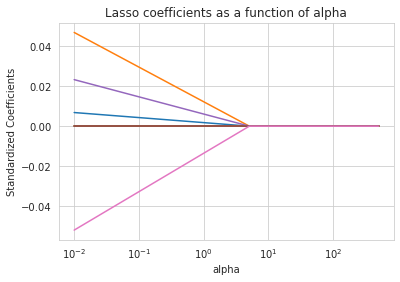

In [247]:
from sklearn.linear_model import Lasso
alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Lasso(alpha=0.01)

 Feature 0: Alpha,
 Score: 0.0068
 Feature 1: Beta,
 Score: 0.04677
 Feature 2: Report_per_Day,
 Score: 0.0
 Feature 3: High_risk_percentage_120d,
 Score: -0.0
 Feature 4: Low_risk_percentage_120d,
 Score: 0.02322
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.0
 Feature 6: Action_Taken_percentage_120d,
 Score: -0.05187


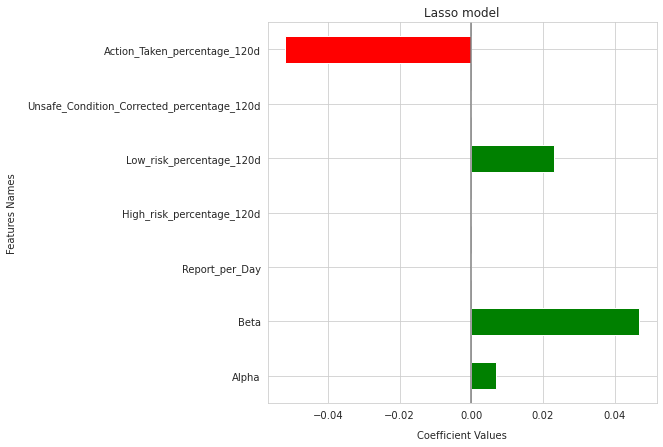

R-squared: 4.775 %
Root Mean Squared Error (RMSE): 0.239


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

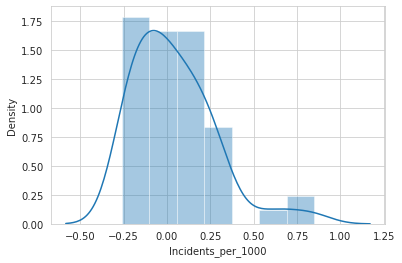

In [248]:
from sklearn.linear_model import Lasso

#define the model
lasso = Lasso(alpha=0.01)

#fit the model
lasso.fit(x_train, y_train) 

#feature importance
feature_importance(lasso,x_train)

#model prediction
pred_lasso = lasso.predict(x_test)

#model evaluation
r2_score_lasso = lasso.score(x_test,y_test)
print("R-squared:",round(r2_score_lasso*100,3),'%')

RMSE_lasso = round(np.sqrt(mean_squared_error(y_test,pred_lasso)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso)

sns.distplot(y_test-pred_lasso)



In [249]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression',
                                   'r2_score_lasso',r2_score_lasso)
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression',
                                   'RMSE_lasso',RMSE_lasso)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


LassoCV(cv=5, max_iter=10000, random_state=13)

Alpha chosen by LassoCV: 0.0072818945233135085
 Feature 0: Alpha,
 Score: 0.00743
 Feature 1: Beta,
 Score: 0.04982
 Feature 2: Report_per_Day,
 Score: 0.0
 Feature 3: High_risk_percentage_120d,
 Score: -0.00323
 Feature 4: Low_risk_percentage_120d,
 Score: 0.02342
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.0
 Feature 6: Action_Taken_percentage_120d,
 Score: -0.05448


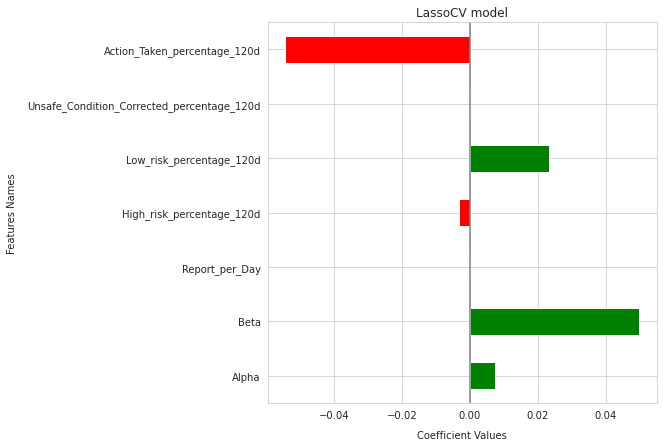

R-squared: 4.188 %
Root Mean Squared Error (RMSE): 0.24


In [250]:
#LassoCV is cross validation method in Lasso regression
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=13, max_iter=10000)

# Fit model
lasso_cv.fit(x_train, y_train)

# find the alpha chosen
print('Alpha chosen by LassoCV:',lasso_cv.alpha_)

#feature importance
feature_importance(lasso_cv,x_train)

#model prediction
pred_lasso_cv = lasso_cv.predict(x_test)

#model evaluation
r2_score_lasso_cv = lasso_cv.score(x_test,y_test)
print("R-squared:",round(r2_score_lasso_cv*100,3),'%')

RMSE_lasso_cv = round(np.sqrt(mean_squared_error(y_test,pred_lasso_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso_cv)


In [251]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression',
                                   'r2_score_lasso_cv',r2_score_lasso_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression',
                                   'RMSE_lasso_cv',RMSE_lasso_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


In [252]:
# import statsmodels.api as sm
# model = sm.OLS(y_train, x_train).fit()
# predictions = model.predict(x_test) 
 
# print_model = model.summary()
# print(print_model)

## Linear Regression with Rig Managers data only <a class="anchor" id="section5"></a>

### Visualization linear relationship <a class="anchor" id="5_1"></a>

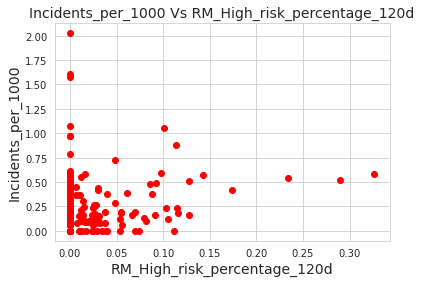

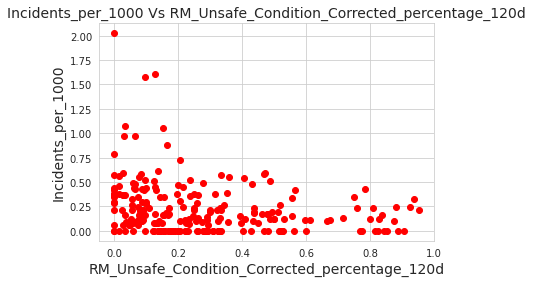

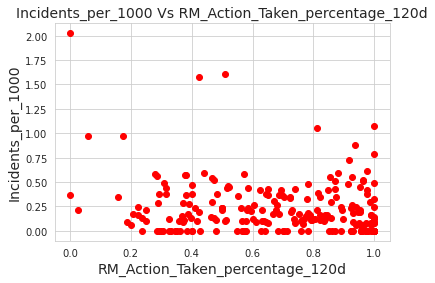

In [253]:
scatter_plot(df_rm,'RM_High_risk_percentage_120d','Incidents_per_1000')
scatter_plot(df_rm,'RM_Unsafe_Condition_Corrected_percentage_120d','Incidents_per_1000')
scatter_plot(df_rm,'RM_Action_Taken_percentage_120d','Incidents_per_1000')



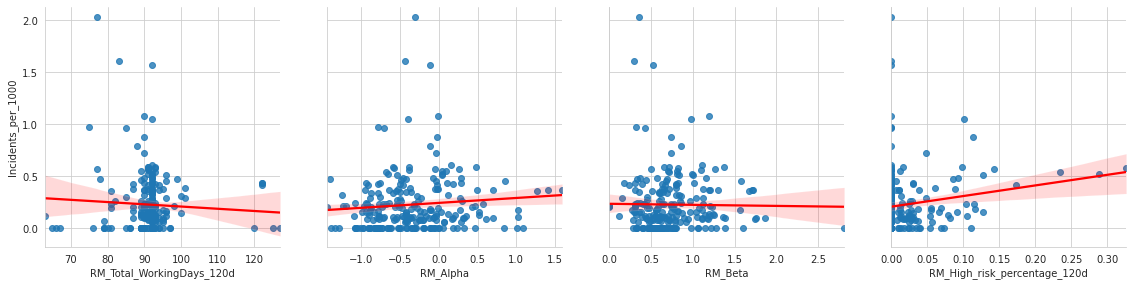

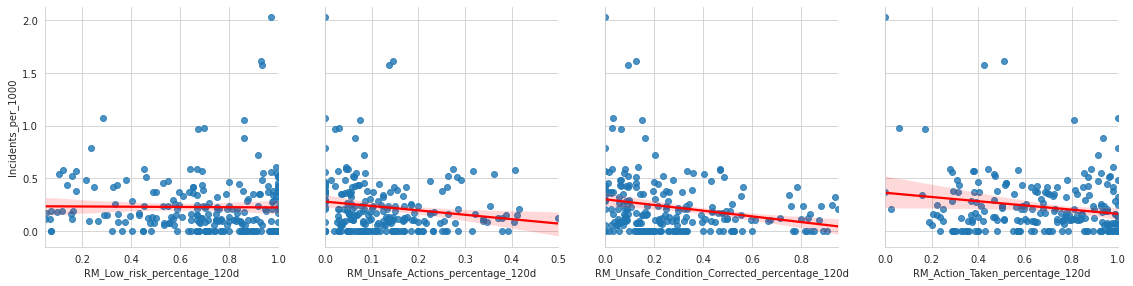

In [254]:
pairplot(x_train_rm, df_rm, 0, 4)
pairplot(x_train_rm, df_rm, 4, 8)


### Formula <a class="anchor" id="5_2"></a>

Dependent_Variable (Y_i) = intercept +  independent variable  + random error term
Incidents_per_100 = add all independent variable 

y = b_0 + b_1*x_1 + b2*x2 + ...

### Model <a class="anchor" id="5_3"></a>

LinearRegression()

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.00566
 Feature 1: RM_Alpha,
 Score: 0.10054
 Feature 2: RM_Beta,
 Score: -0.09589
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.07002
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.05482
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: -0.02253
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: -0.02216
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: -0.06023


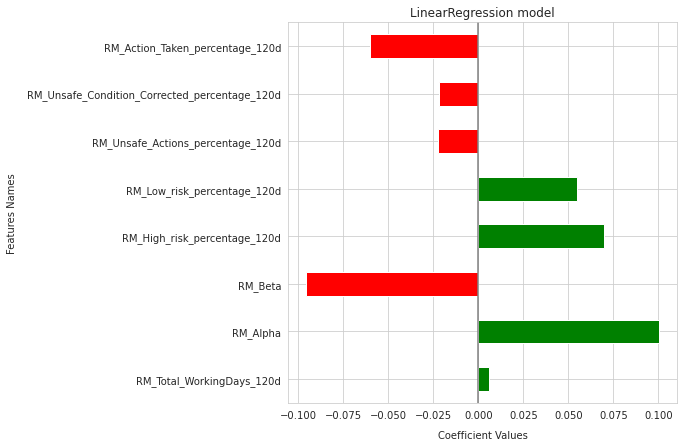

R-squared: -11.915 %
Root Mean Squared Error (RMSE) 0.259


In [255]:
# linear regression feature importance

# define the model
linreg_rm = LinearRegression()

# fit the model
linreg_rm.fit(x_train_rm, y_train_rm)

#feature importance
feature_importance(linreg_rm,x_train_rm)

#model predictions
pred_linreg_rm = linreg_rm.predict(x_test_rm)

#model evaluation
r2_score_linreg_rm = linreg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_linreg_rm*100,3),'%')
RMSE_linreg_rm = round(np.sqrt(metrics.mean_squared_error(y_test_rm,pred_linreg_rm)),3)
print("Root Mean Squared Error (RMSE)",RMSE_linreg_rm)


In [353]:
df_rm.columns.tolist()

['RM_Total_WorkingDays_120d',
 'RM_Alpha',
 'RM_Beta',
 'RM_High_risk_percentage_120d',
 'RM_Low_risk_percentage_120d',
 'RM_Unsafe_Actions_percentage_120d',
 'RM_Unsafe_Condition_Corrected_percentage_120d',
 'RM_Action_Taken_percentage_120d',
 'Incidents_per_1000']

In [256]:
# Updating the Evaluation score table
df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression RM',
                                   'r2_score_linreg_rm',r2_score_linreg_rm)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression RM',
                                   'RMSE_linreg_rm', RMSE_linreg_rm)


df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


### Ridge Regression Rig Managers only <a class="anchor" id="5_4"></a>

Ridge(alpha=0.01)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.00566
 Feature 1: RM_Alpha,
 Score: 0.10051
 Feature 2: RM_Beta,
 Score: -0.09587
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.07002
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.05481
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: -0.02252
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: -0.02217
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: -0.06022


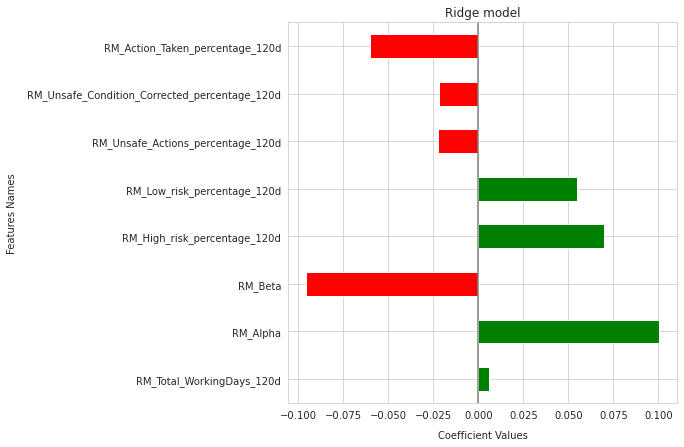

R-squared: -11.906 %
Root Mean Squared Error (RMSE): 0.259


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

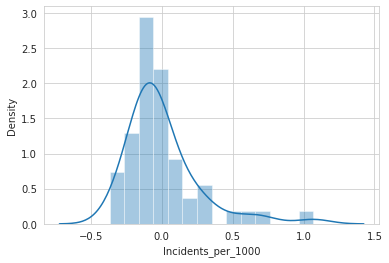

In [257]:
# define model
ridge_rm = Ridge(alpha=0.01)

#fit the model
ridge_rm.fit(x_train_rm,y_train_rm)

#feature importance
feature_importance(ridge_rm,x_train_rm)

#model prediction
pred_ridge_rm = ridge_rm.predict(x_test_rm)

#model evaluation
r2_score_ridge_rm = ridge_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_ridge_rm*100,3),'%')

RMSE_ridge_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_ridge_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge_rm)

sns.distplot(y_test_rm-pred_ridge_rm)


In [258]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression RM',
                                   'r2_score_ridge_rm',r2_score_ridge_rm)
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression RM',
                                   'RMSE_ridge_rm',RMSE_ridge_rm)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]), cv=5)

Alpha chosen by RidgeCV: 10.0
 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.00241
 Feature 1: RM_Alpha,
 Score: 0.07782
 Feature 2: RM_Beta,
 Score: -0.07503
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.06401
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.04644
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: -0.02042
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: -0.02672
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: -0.05428


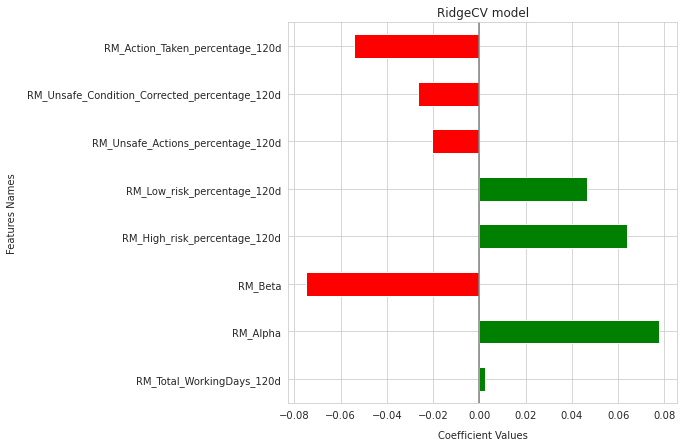

R-squared: -5.273 %
Root Mean Squared Error (RMSE): 0.251


In [259]:
#define the model 
ridge_rm_cv = RidgeCV(alphas=[0.0001,0.001,0.01,1,10], cv=5)

#fit the model
ridge_rm_cv.fit(x_train_rm,y_train_rm)

#find the Alpha chosen
print('Alpha chosen by RidgeCV:',ridge_rm_cv.alpha_) 

#feature importance
feature_importance(ridge_rm_cv,x_train_rm)

#model prediction
pred_ridge_rm_cv = ridge_rm_cv.predict(x_test_rm)

#model evaluation
r2_score_ridge_rm_cv = ridge_rm_cv.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_ridge_rm_cv*100,3),'%')
RMSE_ridge_rm_cv = round(np.sqrt(mean_squared_error(y_test_rm,pred_ridge_rm_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge_rm_cv)


In [260]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression RM',
                                   'r2_score_ridge_rm_cv',r2_score_ridge_rm_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression RM',
                                   'RMSE_ridge_rm_cv',RMSE_ridge_rm_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


### Lasso Regression Rig Managers only <a class="anchor" id="5_5"></a>

Lasso(alpha=0.01)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: -0.0
 Feature 1: RM_Alpha,
 Score: 0.05112
 Feature 2: RM_Beta,
 Score: -0.04787
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.05065
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.03152
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: -0.01256
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: -0.02786
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: -0.04604


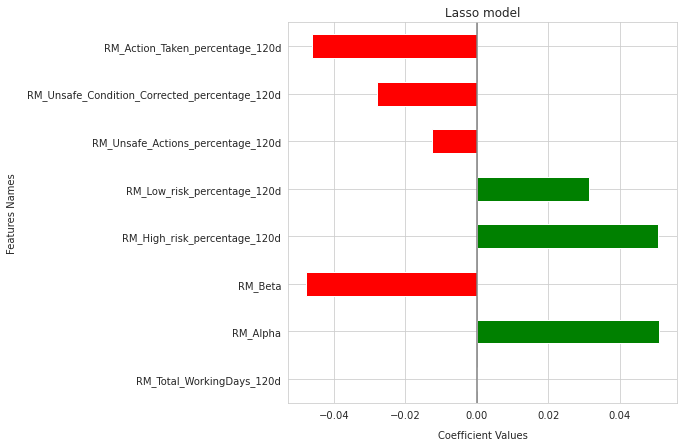

R-squared: 2.342 %
Root Mean Squared Error (RMSE): 0.242


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

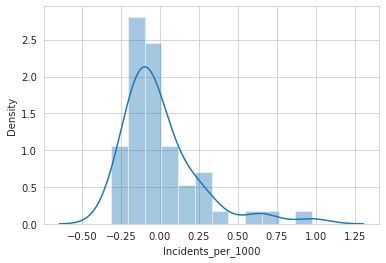

In [261]:
#define the model
lasso_rm = Lasso(alpha=0.01)

#fit the model
lasso_rm.fit(x_train_rm, y_train_rm) 

#feature importance
feature_importance(lasso_rm,x_train_rm)

#model prediction
pred_lasso_rm = lasso_rm.predict(x_test_rm)

#model evaluation
r2_score_lasso_rm = lasso_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_lasso_rm*100,3),'%')

RMSE_lasso_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_lasso_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso_rm)

sns.distplot(y_test_rm-pred_lasso_rm)


In [262]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression RM',
                                   'r2_score_lasso_rm',r2_score_lasso_rm)
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression RM',
                                   'RMSE_lasso_rm',RMSE_lasso_rm)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


LassoCV(cv=5, max_iter=10000, random_state=13)

Alpha chosen by LassoCV: 0.0594669530584772
 Feature 0: RM_Total_WorkingDays_120d,
 Score: -0.0
 Feature 1: RM_Alpha,
 Score: 0.0
 Feature 2: RM_Beta,
 Score: -0.0
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.0
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.0
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: -0.0
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: -0.0
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: -0.0


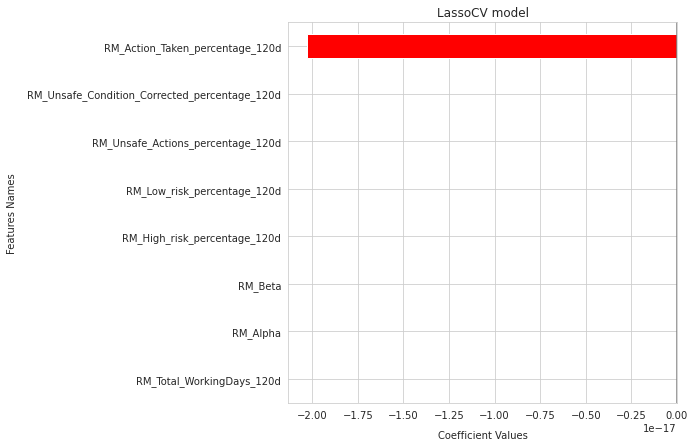

R-squared: -0.546 %
Root Mean Squared Error (RMSE): 0.246


In [263]:
# Lasso with 5 fold cross-validation
lasso_rm_cv = LassoCV(cv=5, random_state=13, max_iter=10000)

# Fit model
lasso_rm_cv.fit(x_train_rm, y_train_rm)

# find the alpha chosen
print('Alpha chosen by LassoCV:',lasso_rm_cv.alpha_)

#feature importance
feature_importance(lasso_rm_cv,x_train_rm)

#model prediction
pred_lasso_rm_cv = lasso_rm_cv.predict(x_test_rm)

#model evaluation
r2_score_lasso_rm_cv = lasso_rm_cv.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_lasso_rm_cv*100,3),'%')

RMSE_lasso_rm_cv = round(np.sqrt(mean_squared_error(y_test_rm,pred_lasso_rm_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso_rm_cv)


In [264]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression RM',
                                   'r2_score_lasso_rm_cv',r2_score_lasso_rm_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression RM',
                                   'RMSE_lasso_rm_cv',RMSE_lasso_rm_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


## Decision Tree Regressor for all positions <a class="anchor" id="section6"></a>

DecisionTreeRegressor(random_state=13)

 Feature 0: Alpha,
 Score: 0.05982
 Feature 1: Beta,
 Score: 0.09082
 Feature 2: Report_per_Day,
 Score: 0.05128
 Feature 3: High_risk_percentage_120d,
 Score: 0.02103
 Feature 4: Low_risk_percentage_120d,
 Score: 0.22595
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.31309
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.23801


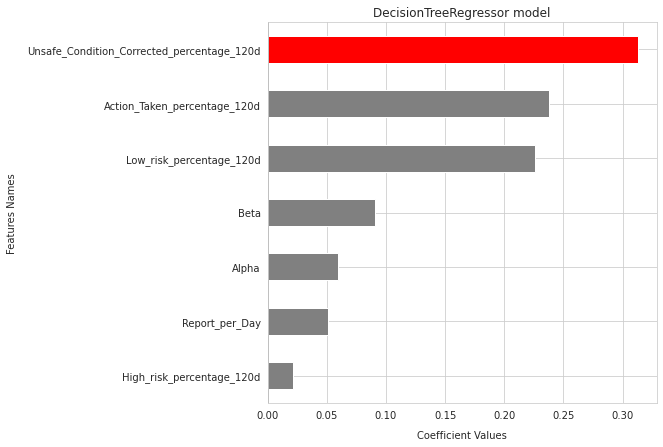

R-squared: -40.177 %
Root Mean Squared Error (RMSE): 0.29


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

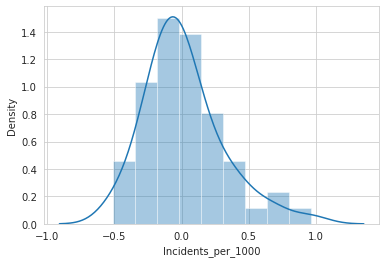

In [265]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from functions import feature_importance_trees

# define the model
TreeReg = DecisionTreeRegressor(random_state=13)

# fit the model
TreeReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(TreeReg,x_train)

#model predictions
pred_TreeReg =TreeReg.predict(x_test)

#model evaluation
r2_score_TreeReg = TreeReg.score(x_test,y_test)
print("R-squared:",round(r2_score_TreeReg*100,3),'%')
RMSE_TreeReg = round(np.sqrt(mean_squared_error(y_test,pred_TreeReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_TreeReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_TreeReg)


### Hyperparameter tuning  <a class="anchor" id="6_1"></a>

In [266]:
# Hyper parameters range intialization for tuning using GridSearch
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
            "min_samples_leaf":[1,2,3,4,5,6],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60] }

In [267]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(TreeReg,param_grid=parameters,
                          scoring='neg_mean_squared_error',
                          cv=5,verbose=3)

In [268]:
%%capture
from datetime import datetime

start_time = datetime.now()

tuning_model.fit(x_train, y_train)

end_time = datetime.now()


In [269]:
#calculate the time it took the model for the GridSearchCV
total_time_TreeReg = end_time - start_time
print('Duration: {}'.format(total_time_TreeReg))

Duration: 0:02:53.135745


In [270]:
# best hyperparameters 
params = tuning_model.best_params_

# best model score
tuning_model.best_score_

-0.06537865957191624

In [271]:
params

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'random'}

DecisionTreeRegressor(max_depth=3, max_features='auto',
                      min_weight_fraction_leaf=0.2, random_state=13,
                      splitter='random')

 Feature 0: Alpha,
 Score: 0.47355
 Feature 1: Beta,
 Score: 0.0
 Feature 2: Report_per_Day,
 Score: 0.0
 Feature 3: High_risk_percentage_120d,
 Score: 0.0
 Feature 4: Low_risk_percentage_120d,
 Score: 0.0
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.52645
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.0


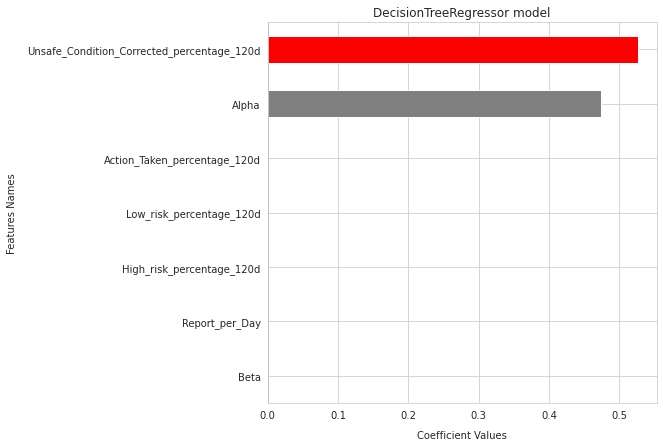

R-squared: 17.766 %
Root Mean Squared Error (RMSE): 0.222


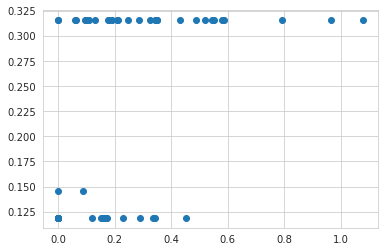

In [272]:
# define the new model after hyperparameters tuning
tuned_TreeReg=DecisionTreeRegressor(max_depth=list(params.values())[0],
                                        max_features=list(params.values())[1],
                                        max_leaf_nodes=list(params.values())[2],
                                        min_samples_leaf=list(params.values())[3],
                                        min_weight_fraction_leaf=list(params.values())[4],
                                        splitter=list(params.values())[5],
                                       random_state=13)

#fitting model
tuned_TreeReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_TreeReg,x_train)

#model prediction 
tuned_pred_TreeReg= tuned_TreeReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_TreeReg = tuned_TreeReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_TreeReg*100,3),'%')
RMSE_tuned_TreeReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_TreeReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_TreeReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))

#scatter plot
plt.scatter(y_test,tuned_pred_TreeReg)


In [273]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor',
                                   'r2_score_tuned_TreeReg',r2_score_tuned_TreeReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor',
                                   'RMSE_tuned_TreeReg',RMSE_tuned_TreeReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


|--- feature_5 <= -0.09
|   |--- feature_0 <= -0.40
|   |   |--- value: [0.15]
|   |--- feature_0 >  -0.40
|   |   |--- value: [0.32]
|--- feature_5 >  -0.09
|   |--- value: [0.12]



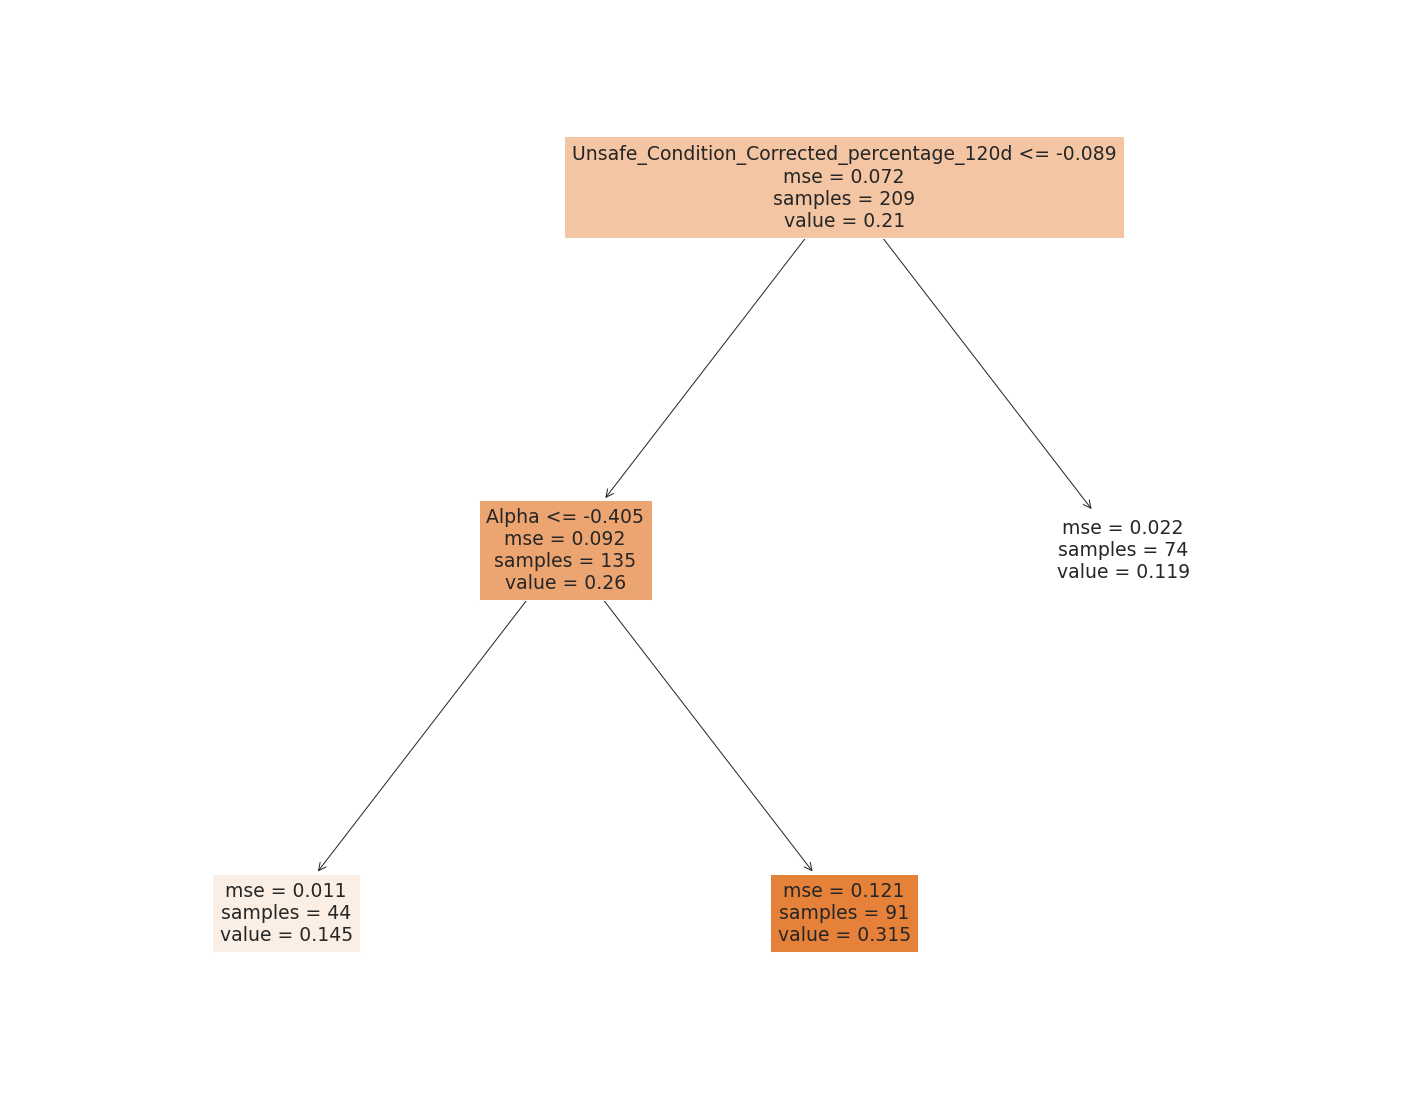

In [274]:
#visualise the decision tree
from sklearn import tree
text_representation = tree.export_text(tuned_TreeReg)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tuned_TreeReg, feature_names=df.columns.values, filled=True)


## Decision Tree Regressor with Rig Managers data <a class="anchor" id="section7"></a>

DecisionTreeRegressor(random_state=13)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.01366
 Feature 1: RM_Alpha,
 Score: 0.07106
 Feature 2: RM_Beta,
 Score: 0.13405
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.05855
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.18242
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.2577
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.0772
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.20534


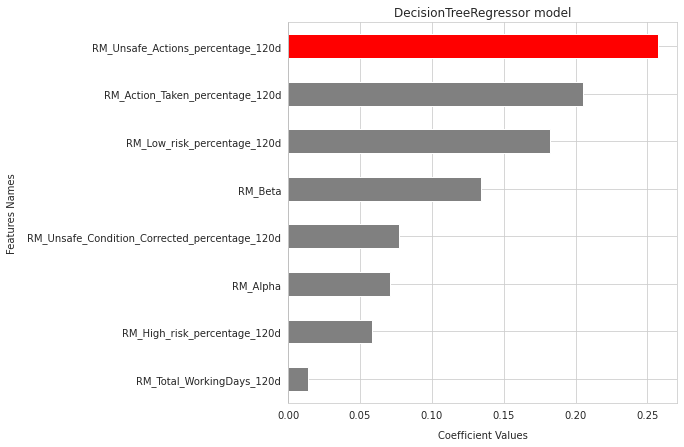

R-squared: -157.183 %
Root Mean Squared Error (RMSE): 0.393


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

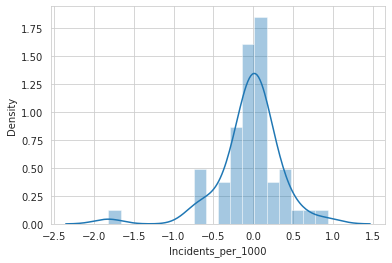

In [275]:
# define the model
TreeReg_rm = DecisionTreeRegressor(random_state=13)

# fit the model
TreeReg_rm.fit(x_train_rm, y_train_rm)

#feature importance
feature_importance_trees(TreeReg_rm,x_train_rm)

#model predictions
pred_TreeReg_rm = TreeReg_rm.predict(x_test_rm)

#model evaluation
r2_score_TreeReg_rm = TreeReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_TreeReg_rm*100,3),'%')
RMSE_TreeReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_TreeReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_TreeReg_rm)

#checking difference between labled y and predicted y
sns.distplot(y_test_rm-pred_TreeReg_rm)



### Hyperparameter tuning  <a class="anchor" id="7_1"></a>

In [276]:
# Hyper parameters range intialization for tuning using GridSearch
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
            "min_samples_leaf":[1,2,3,4,5,6],
            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60] }

In [277]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(TreeReg_rm,param_grid=parameters,
                          scoring='neg_mean_squared_error',
                          cv=5,verbose=3)

In [278]:
%%capture
from datetime import datetime

start_time = datetime.now()

tuning_model.fit(x_train_rm, y_train_rm)

end_time = datetime.now()


In [279]:
#calculate the time it took the model for the GridSearchCV
total_time_TreeReg_rm = end_time - start_time
print('Duration: {}'.format(total_time_TreeReg_rm))

Duration: 0:02:53.006407


In [280]:
# best hyperparameters 
params = tuning_model.best_params_

# best model score
tuning_model.best_score_

-0.0830255689267132

DecisionTreeRegressor(max_depth=3, max_features='log2',
                      min_weight_fraction_leaf=0.1, random_state=13,
                      splitter='random')

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.0
 Feature 1: RM_Alpha,
 Score: 0.0
 Feature 2: RM_Beta,
 Score: 0.0
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.0
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.0
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.0
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.46304
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.53696


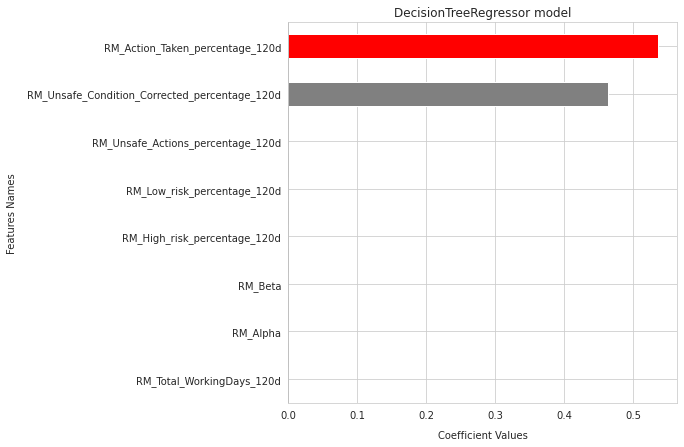

R-squared: 5.993 %
Root Mean Squared Error (RMSE): 0.238


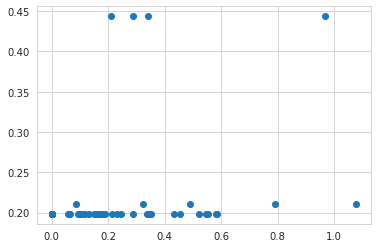

In [281]:
# define the new model after hyperparameters tuning
tuned_TreeReg_rm=DecisionTreeRegressor(max_depth=list(params.values())[0],
                                        max_features=list(params.values())[1],
                                        max_leaf_nodes=list(params.values())[2],
                                        min_samples_leaf=list(params.values())[3],
                                        min_weight_fraction_leaf=list(params.values())[4],
                                        splitter=list(params.values())[5],
                                       random_state=13)

#fit the model
tuned_TreeReg_rm.fit(x_train_rm,y_train_rm)

#feature importance
feature_importance_trees(tuned_TreeReg_rm,x_train_rm)

#model prediction 
tuned_pred_TreeReg_rm= tuned_TreeReg_rm.predict(x_test_rm)

#model evaluation with hyperparameter tuned 
r2_score_tuned_TreeReg_rm = tuned_TreeReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_tuned_TreeReg_rm*100,3),'%')
RMSE_tuned_TreeReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,tuned_pred_TreeReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_TreeReg_rm)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))

#scatter plot
plt.scatter(y_test_rm,tuned_pred_TreeReg_rm)


In [282]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor RM',
                                   'r2_score_tuned_TreeReg_rm',r2_score_tuned_TreeReg_rm)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor RM',
                                   'RMSE_tuned_TreeReg_rm',RMSE_tuned_TreeReg_rm)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


|--- feature_6 <= -0.83
|   |--- feature_7 <= -0.18
|   |   |--- value: [0.44]
|   |--- feature_7 >  -0.18
|   |   |--- value: [0.21]
|--- feature_6 >  -0.83
|   |--- value: [0.20]



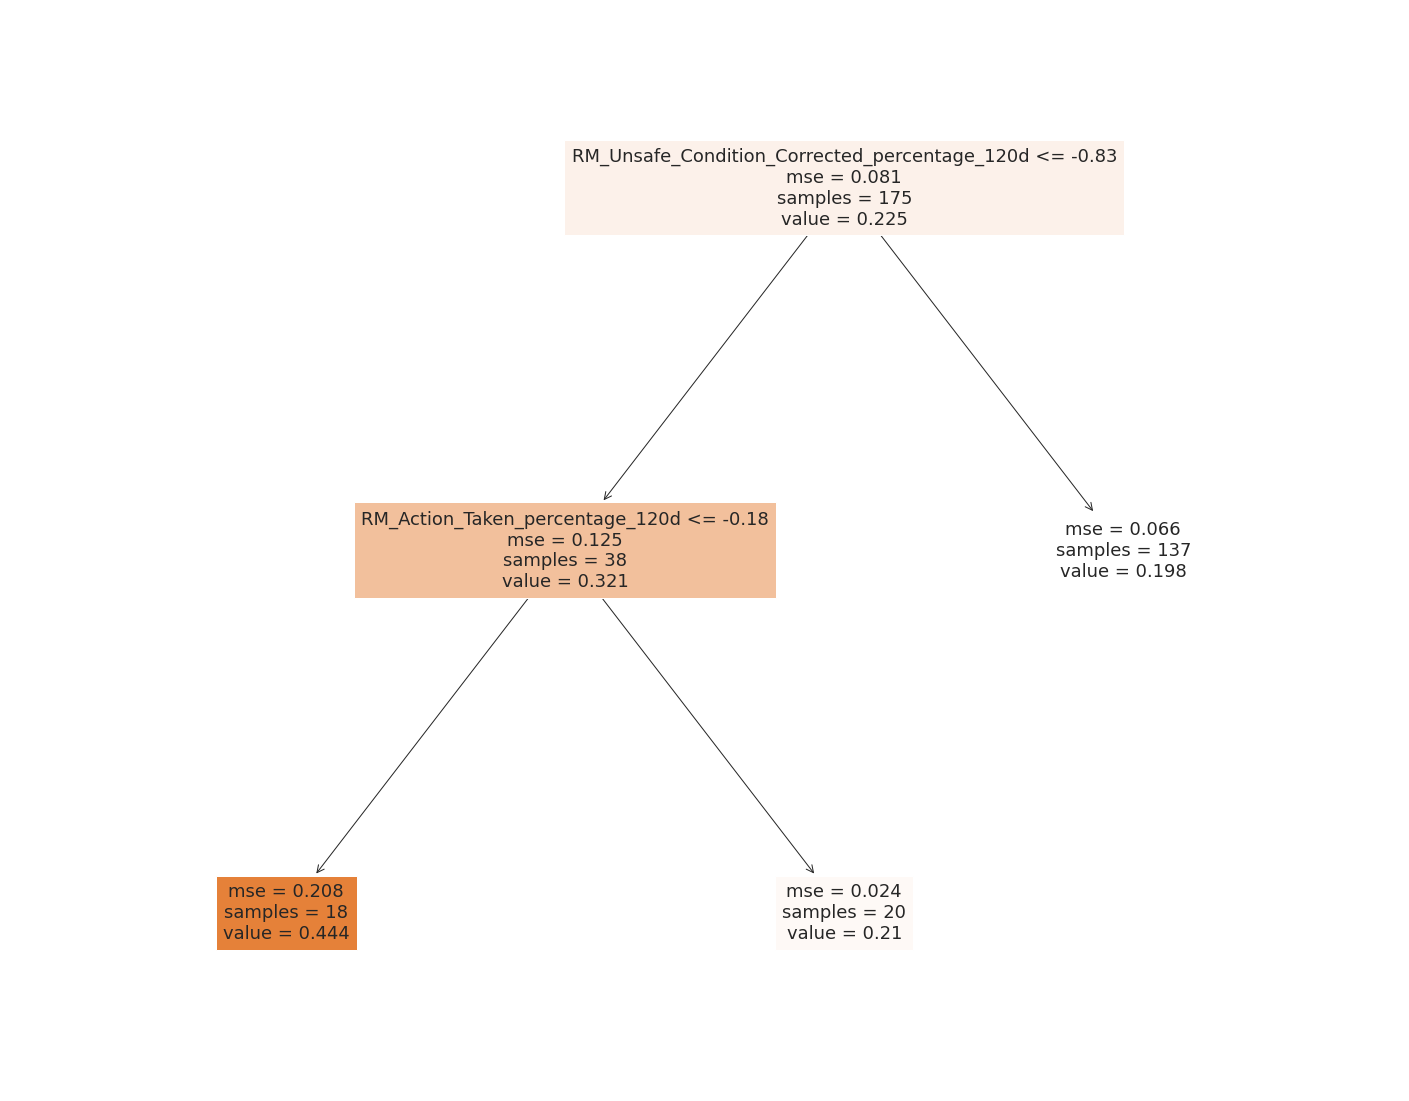

In [283]:
#visualise the decision tree
from sklearn import tree
text_representation = tree.export_text(tuned_TreeReg_rm)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tuned_TreeReg_rm, feature_names=df_rm.columns.values, filled=True)


## Random Forest Regressor for all positions <a class="anchor" id="section8"></a>

RandomForestRegressor(n_estimators=10, random_state=13)

 Feature 0: Alpha,
 Score: 0.06015
 Feature 1: Beta,
 Score: 0.11783
 Feature 2: Report_per_Day,
 Score: 0.04888
 Feature 3: High_risk_percentage_120d,
 Score: 0.09036
 Feature 4: Low_risk_percentage_120d,
 Score: 0.19192
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.30301
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.18784


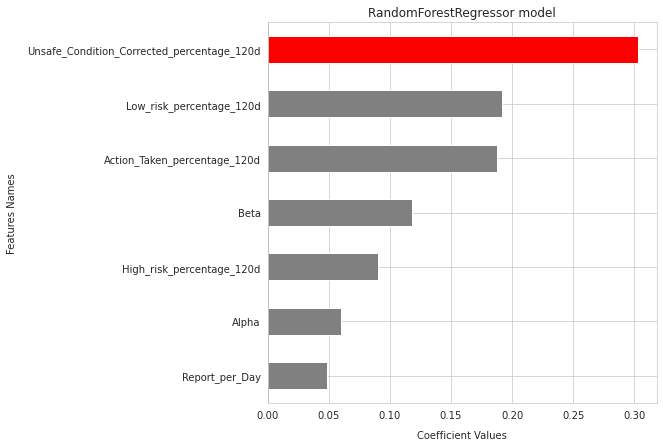

R-squared: -5.674 %
Root Mean Squared Error (RMSE): 0.252


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

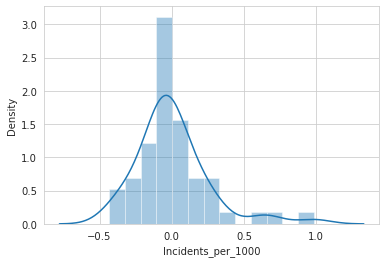

In [284]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor

# define the model
RandForestReg = RandomForestRegressor(n_estimators = 10, random_state = 13)

# fit the model
RandForestReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(RandForestReg,x_train)

#model predictions
pred_RandForestReg =RandForestReg.predict(x_test)

#model evaluation
r2_score_RandForestReg = RandForestReg.score(x_test,y_test)
print("R-squared:",round(r2_score_RandForestReg*100,3),'%')
RMSE_RandForestReg = round(np.sqrt(mean_squared_error(y_test,pred_RandForestReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_RandForestReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_RandForestReg)



### Hyperparameter tuning  <a class="anchor" id="8_1"></a>

In [285]:
# Hyper parameters range intialization for tuning using RandomizedSearchCV
parameters = {'n_estimators': [50, 80, 100, 200, 400, 600],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [6, 8, 10, 12, 14],
               'bootstrap': [True, False]}


In [286]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores (-1)
tuning_RandForestReg = RandomizedSearchCV(estimator = RandForestReg, 
                               param_distributions = parameters, 
                               n_iter = 100, cv = 5, verbose=2, 
                               random_state=13, n_jobs = -1)



In [287]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_RandForestReg.fit(x_train, y_train)

end_time = datetime.now()


In [288]:
#calculate the time it took the model for the GridSearchCV
total_time_RandForestReg = end_time - start_time
print('Duration: {}'.format(total_time_RandForestReg))

Duration: 0:00:33.079398


In [289]:
# best hyperparameters 
params = tuning_RandForestReg.best_params_

# best model score
tuning_RandForestReg.best_score_

0.11080791159027348

In [290]:
params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 14,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=14,
                      min_samples_split=10, random_state=13)

 Feature 0: Alpha,
 Score: 0.09693
 Feature 1: Beta,
 Score: 0.15037
 Feature 2: Report_per_Day,
 Score: 0.0492
 Feature 3: High_risk_percentage_120d,
 Score: 0.03272
 Feature 4: Low_risk_percentage_120d,
 Score: 0.15111
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.3036
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.21608


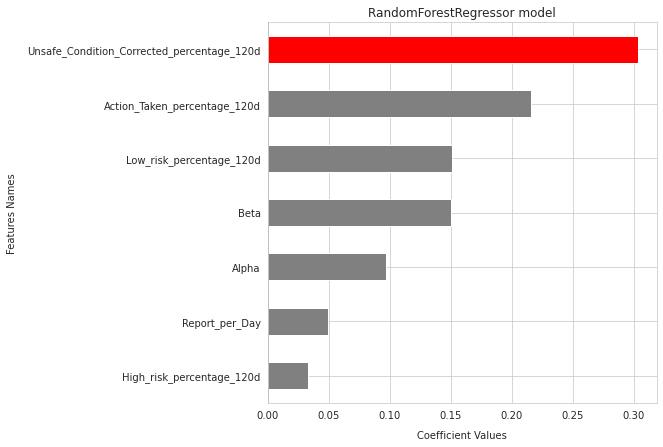

R-squared: 26.644 %
Root Mean Squared Error (RMSE): 0.21


In [291]:
# define the new model after hyperparameters tuning
tuned_RandForestReg=RandomForestRegressor(n_estimators=list(params.values())[0],
                                          min_samples_split=list(params.values())[1],
                                          min_samples_leaf=list(params.values())[2],
                                          max_features=list(params.values())[3],
                                          max_depth=list(params.values())[4],
                                          bootstrap=list(params.values())[5],
                                          random_state=13)

#fitting model
tuned_RandForestReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_RandForestReg,x_train)

#model prediction 
tuned_pred_RandForestReg = tuned_RandForestReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_RandForestReg = tuned_RandForestReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_RandForestReg*100,3),'%')
RMSE_tuned_RandForestReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_RandForestReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_RandForestReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [292]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor',
                                   'r2_score_tuned_RandForestReg',r2_score_tuned_RandForestReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor',
                                   'RMSE_tuned_RandForestReg',RMSE_tuned_RandForestReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


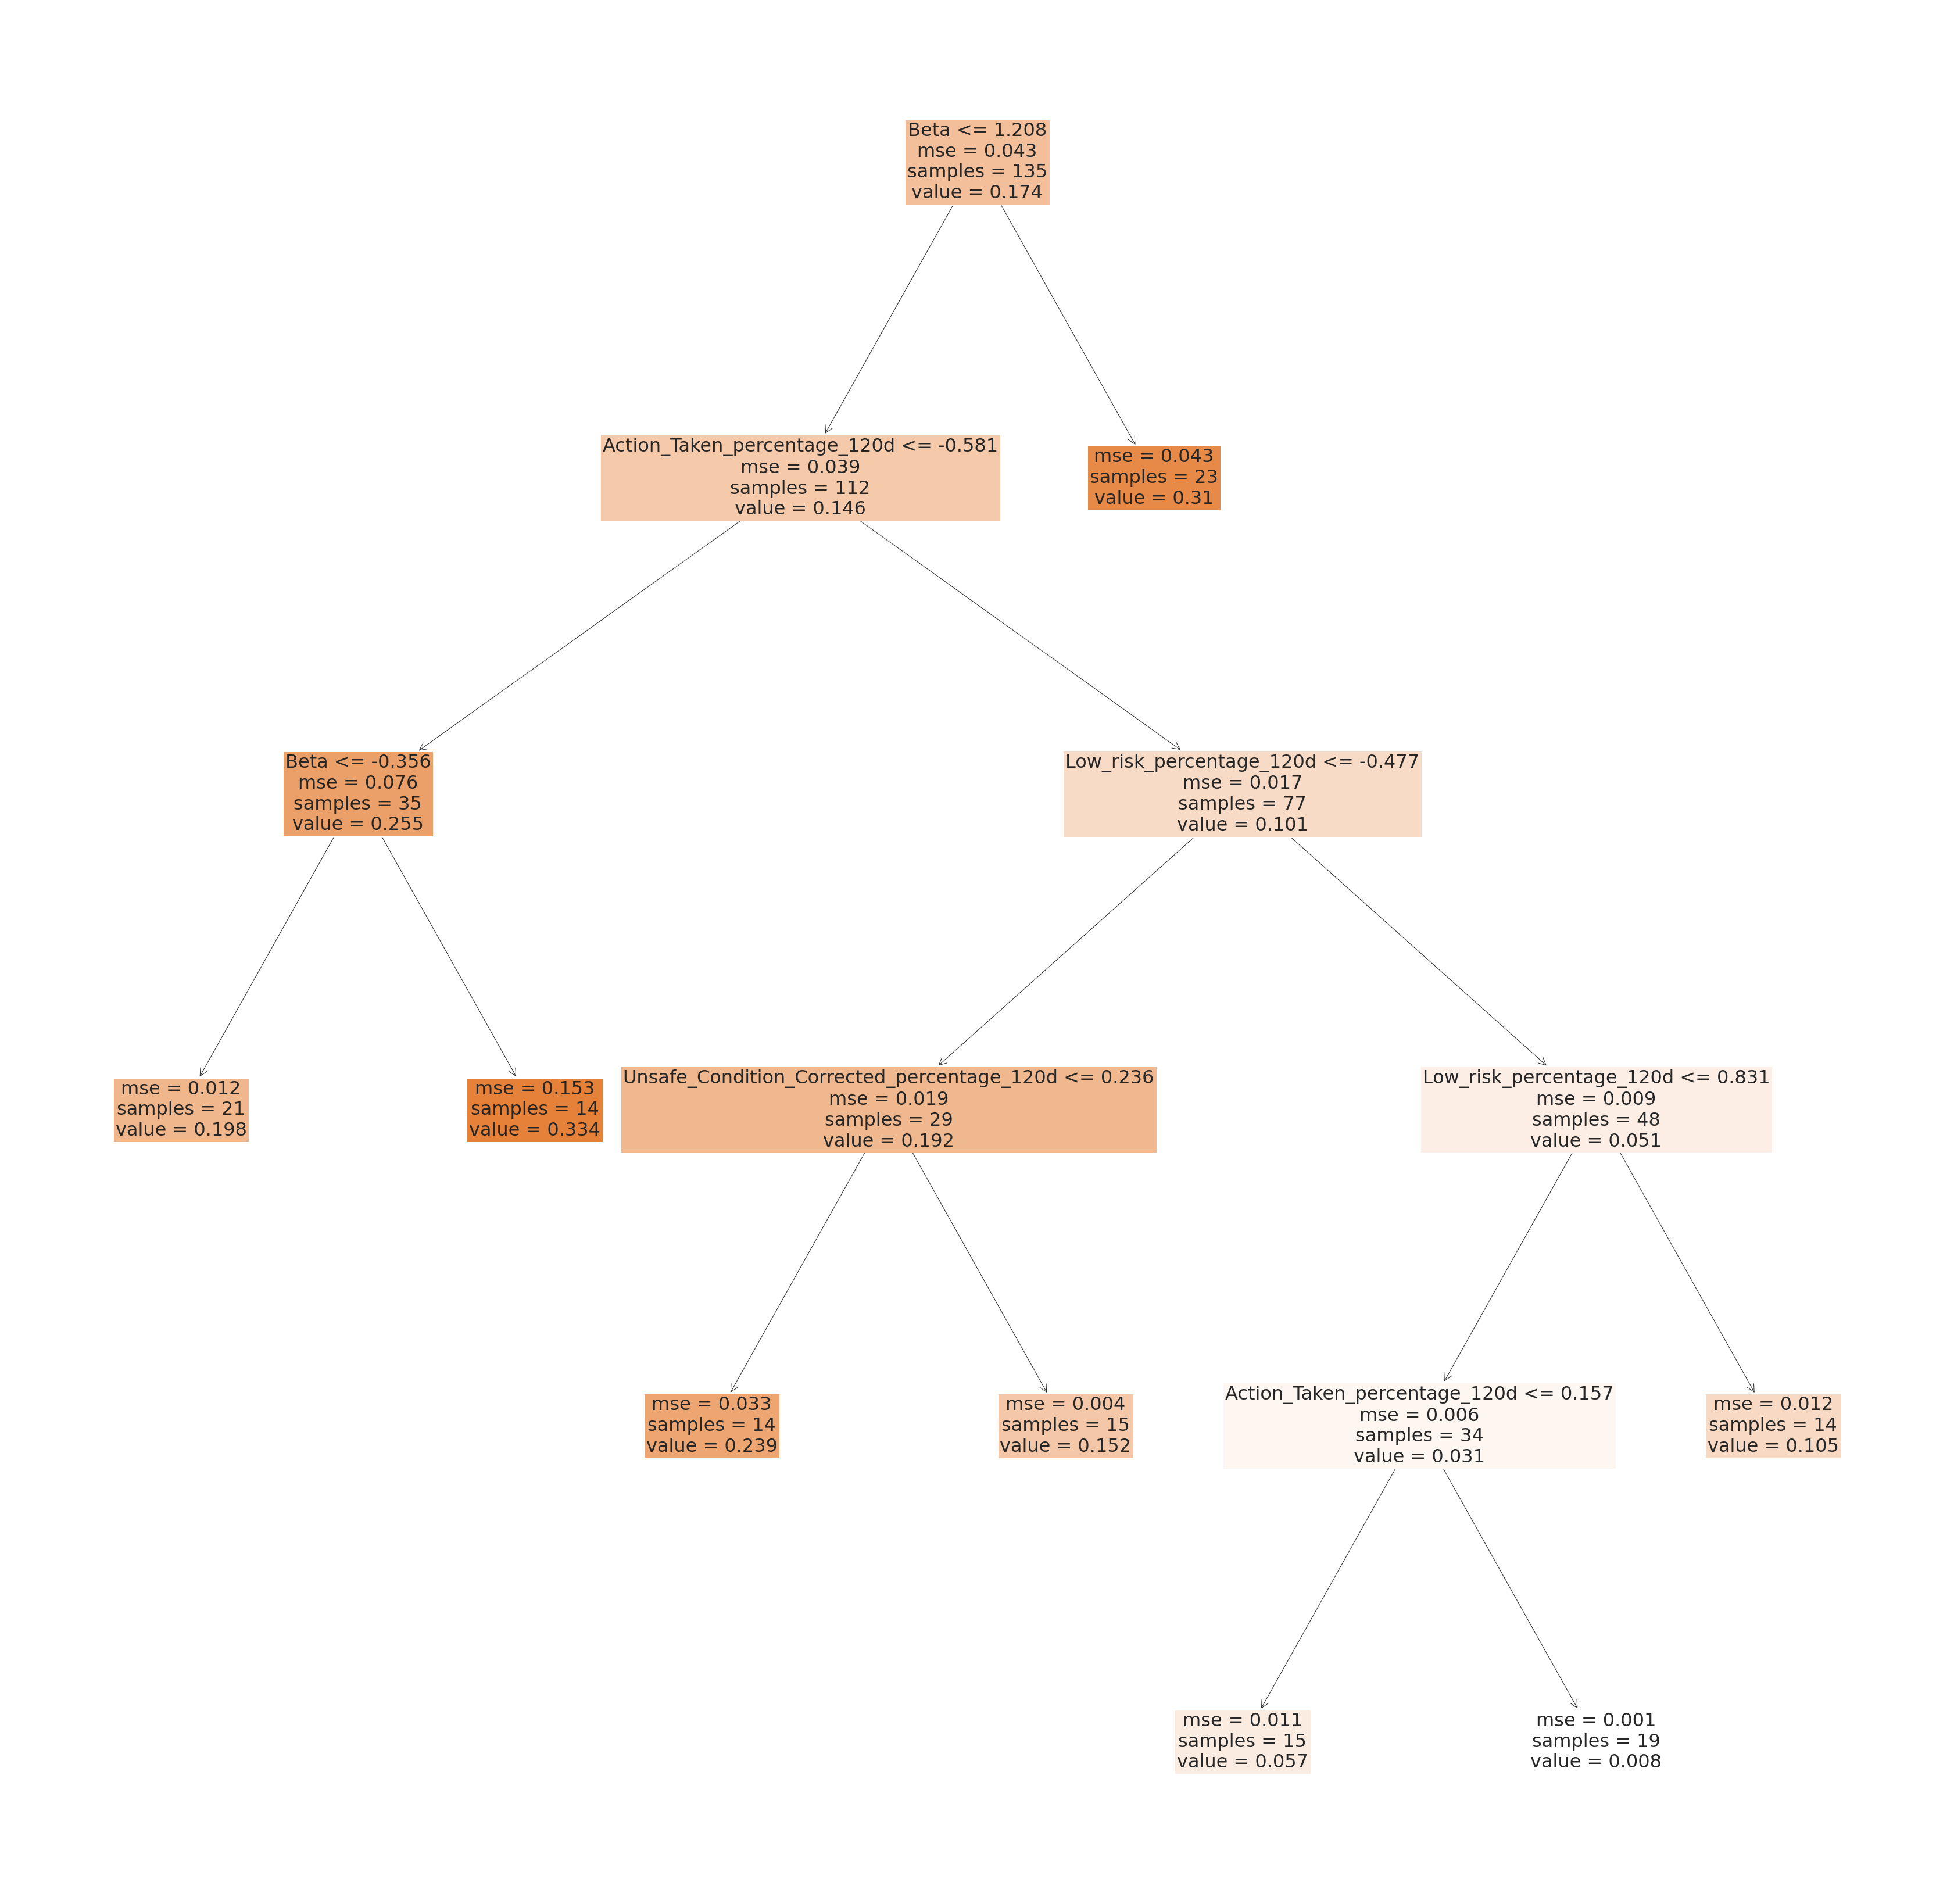

In [336]:
#visualise the random forest tree
from sklearn import tree

fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(tuned_RandForestReg.estimators_[0], filled=True,
                   feature_names=df.columns.values,
                   fontsize=32)
fig.savefig("./images/random_forest.png")


## Random Forest Regressor with Rig Managers Data only <a class="anchor" id="section9"></a>

RandomForestRegressor()

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.07608
 Feature 1: RM_Alpha,
 Score: 0.15455
 Feature 2: RM_Beta,
 Score: 0.12632
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.08529
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.11265
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.0969
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.12463
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.22358


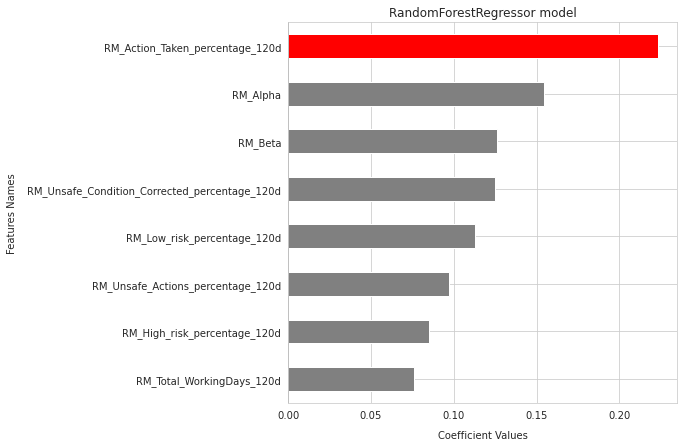

R-squared: -30.236 %
Root Mean Squared Error (RMSE): 0.28


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

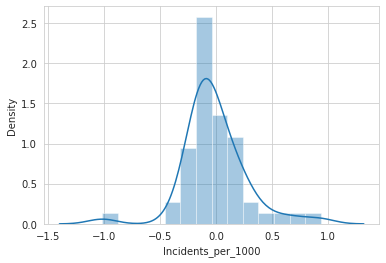

In [294]:
# define the model
RandForestReg_rm = RandomForestRegressor()

# fit the model
RandForestReg_rm.fit(x_train_rm, y_train_rm)

#feature importance
feature_importance_trees(RandForestReg_rm,x_train_rm)

#model predictions
pred_RandForestReg_rm = RandForestReg_rm.predict(x_test_rm)

#model evaluation
r2_score_RandForestReg_rm = RandForestReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_RandForestReg_rm*100,3),'%')
RMSE_RandForestReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_RandForestReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_RandForestReg_rm)

#checking difference between labled y and predicted y
sns.distplot(y_test_rm-pred_RandForestReg_rm)



### Hyperparameter tuning  <a class="anchor" id="9_1"></a>

In [295]:
# Hyper parameters range intialization for tuning using RandomizedSearchCV
parameters = {'n_estimators': [100, 200, 400, 600, 700, 800],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [30, 40, 50, 60, 70, None],
               'min_samples_split': [10,13,14,15,17,18],
               'min_samples_leaf': [2, 4, 6, 8, 10],
               'bootstrap': [True, False]}


In [296]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores (-1)
tuning_RandForestReg_rm = RandomizedSearchCV(estimator = RandForestReg_rm, 
                               param_distributions = parameters, 
                               n_iter = 100, cv = 5, verbose=2, 
                               random_state=13, n_jobs = -1)



In [297]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_RandForestReg_rm.fit(x_train_rm, y_train_rm)

end_time = datetime.now()


In [298]:
#calculate the time it took the model for the GridSearchCV
total_time_RandForestReg_rm = end_time - start_time
print('Duration: {}'.format(total_time_RandForestReg_rm))

Duration: 0:00:57.461344


In [299]:
# best hyperparameters 
params = tuning_RandForestReg_rm.best_params_

# best model score
tuning_RandForestReg_rm.best_score_

0.008611550593622286

In [300]:
params

{'n_estimators': 200,
 'min_samples_split': 17,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=8,
                      min_samples_split=17, n_estimators=200, random_state=13)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.03361
 Feature 1: RM_Alpha,
 Score: 0.13209
 Feature 2: RM_Beta,
 Score: 0.18179
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.12195
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.15741
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.05758
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.19973
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.11583


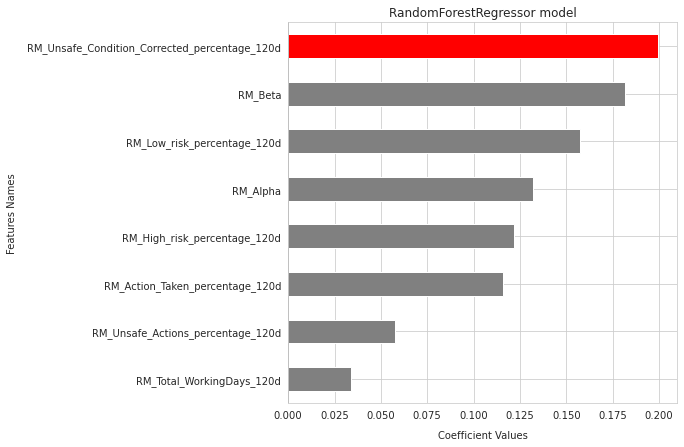

R-squared: 9.521 %
Root Mean Squared Error (RMSE): 0.233


In [301]:
# define the new model after hyperparameters tuning
tuned_RandForestReg_rm=RandomForestRegressor(n_estimators=list(params.values())[0],
                                          min_samples_split=list(params.values())[1],
                                          min_samples_leaf=list(params.values())[2],
                                          max_features=list(params.values())[3],
                                          max_depth=list(params.values())[4],
                                          bootstrap=list(params.values())[5],
                                          random_state=13)

#fitting model
tuned_RandForestReg_rm.fit(x_train_rm,y_train_rm)

#feature importance
feature_importance_trees(tuned_RandForestReg_rm,x_train_rm)

#model prediction 
tuned_pred_RandForestReg_rm = tuned_RandForestReg_rm.predict(x_test_rm)

#model evaluation with hyperparameter tuned 
r2_score_tuned_RandForestReg_rm = tuned_RandForestReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_tuned_RandForestReg_rm*100,3),'%')
RMSE_tuned_RandForestReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,tuned_pred_RandForestReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_RandForestReg_rm)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [302]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor RM',
                                   'r2_score_tuned_RandForestReg_rm',r2_score_tuned_RandForestReg_rm)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor RM',
                                   'RMSE_tuned_RandForestReg_rm',RMSE_tuned_RandForestReg_rm)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


In [303]:
#visualise the random forest tree
fig = plt.figure(figsize=(50,40))
#_ = tree.plot_tree(tuned_RandForestReg_rm.estimators_[0], filled=True, feature_names=df.columns.values)



<Figure size 3600x2880 with 0 Axes>

## XGBoost for all positions <a class="anchor" id="section10"></a>

In [304]:
%%capture
!pip install xgboost

In [305]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.1


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: Alpha,
 Score: 0.02824999950826168
 Feature 1: Beta,
 Score: 0.12838000059127808
 Feature 2: Report_per_Day,
 Score: 0.02565000019967556
 Feature 3: High_risk_percentage_120d,
 Score: 0.25001999735832214
 Feature 4: Low_risk_percentage_120d,
 Score: 0.09424000233411789
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.40413999557495117
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.06932000070810318


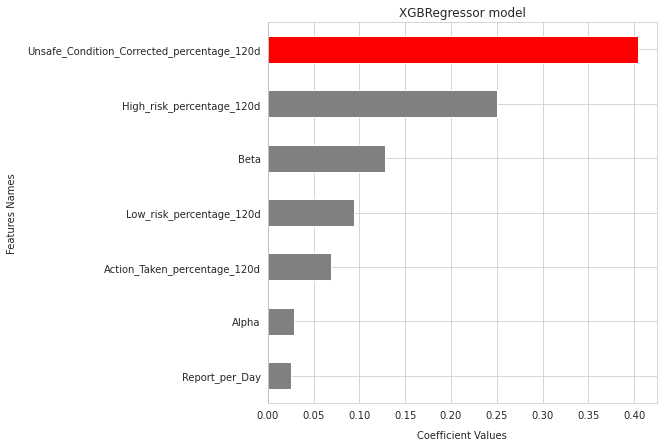

R-squared: 10.777 %
Root Mean Squared Error (RMSE): 0.231


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

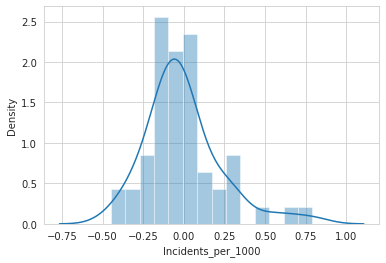

In [306]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor

# define the model
XGBReg = XGBRegressor(random_state=13, objective='reg:squarederror')

# fit the model
XGBReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(XGBReg,x_train)

#model predictions
pred_XGBReg = XGBReg.predict(x_test)

#model evaluation
r2_score_XGBReg = XGBReg.score(x_test,y_test)
print("R-squared:",round(r2_score_XGBReg*100,3),'%')
RMSE_XGBReg = round(np.sqrt(mean_squared_error(y_test,pred_XGBReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_XGBReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_XGBReg)


### Hyperparameter tuning <a class="anchor" id="10_1"></a>

In [307]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [308]:
tuning_XGBReg = GridSearchCV(estimator=XGBReg, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1, cv=2, n_jobs = -1)

In [309]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_XGBReg.fit(x_train, y_train)

end_time = datetime.now()


In [310]:
#calculate the time it took the model for the GridSearchCV
total_time_XGBReg = end_time - start_time
print('Duration: {}'.format(total_time_XGBReg))

Duration: 0:46:51.135124


In [311]:
# best hyperparameters 
params = tuning_XGBReg.best_params_

# best model score
tuning_XGBReg.best_score_

-0.07334352441013706

In [312]:
params

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: Alpha,
 Score: 0.12794999778270721
 Feature 1: Beta,
 Score: 0.15327000617980957
 Feature 2: Report_per_Day,
 Score: 0.12439999729394913
 Feature 3: High_risk_percentage_120d,
 Score: 0.12056999653577805
 Feature 4: Low_risk_percentage_120d,
 Score: 0.12907999753952026
 Feature 5: Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.19291000068187714
 Feature 6: Action_Taken_percentage_120d,
 Score: 0.15183000266551971


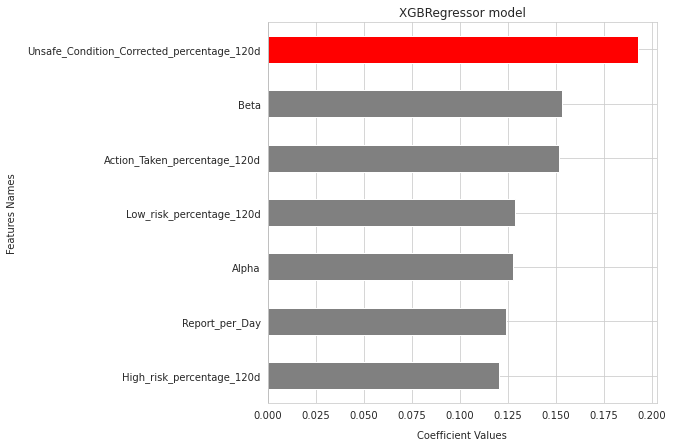

R-squared: 18.187 %
Root Mean Squared Error (RMSE): 0.222


In [313]:
# define the new model after hyperparameters tuning
tuned_XGBReg = XGBRegressor(colsample_bytree=list(params.values())[0],
                                          learning_rate=list(params.values())[1],
                                          max_depth=list(params.values())[2],
                                          n_estimators=list(params.values())[3],                              
                                          random_state=13)

#fitting model
tuned_XGBReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_XGBReg,x_train)

#model prediction 
tuned_pred_XGBReg = tuned_XGBReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_XGBReg = tuned_XGBReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_XGBReg*100,3),'%')
RMSE_tuned_XGBReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_XGBReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_XGBReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [314]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor',
                                   'r2_score_tuned_XGBReg',r2_score_tuned_XGBReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor',
                                   'RMSE_tuned_XGBReg',RMSE_tuned_XGBReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


## XGBoost with Rig Manager data only <a class="anchor" id="section11"></a>

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.04991000145673752
 Feature 1: RM_Alpha,
 Score: 0.06605000048875809
 Feature 2: RM_Beta,
 Score: 0.036660000681877136
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.15588000416755676
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.17015999555587769
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.16366000473499298
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.10824999958276749
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.24942000210285187


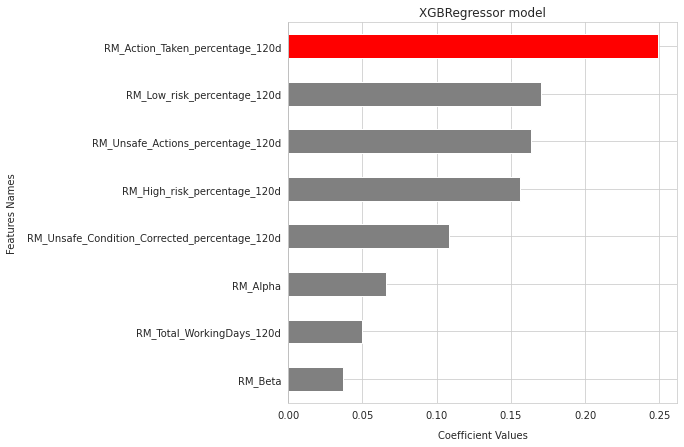

R-squared: -26.849 %
Root Mean Squared Error (RMSE): 0.276


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

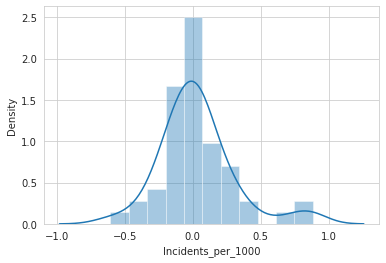

In [315]:
# define the model
XGBReg_rm = XGBRegressor(random_state=13, objective='reg:squarederror')

# fit the model
XGBReg_rm.fit(x_train_rm, y_train_rm)

#feature importance
feature_importance_trees(XGBReg_rm,x_train_rm)

#model predictions
pred_XGBReg_rm = XGBReg_rm.predict(x_test_rm)

#model evaluation
r2_score_XGBReg_rm = XGBReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_XGBReg_rm*100,3),'%')
RMSE_XGBReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_XGBReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_XGBReg_rm)

#checking difference between labled y and predicted y
sns.distplot(y_test_rm-pred_XGBReg_rm)


### Hyperparameter tuning <a class="anchor" id="11_1"></a>

In [316]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [317]:
tuning_XGBReg_rm = GridSearchCV(estimator=XGBReg_rm, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1, cv=2, n_jobs = -1)

In [318]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_XGBReg_rm.fit(x_train_rm, y_train_rm)

end_time = datetime.now()


In [319]:
#calculate the time it took the model for the GridSearchCV
total_time_XGBReg_rm = end_time - start_time
print('Duration: {}'.format(total_time_XGBReg_rm))

Duration: 0:54:32.776827


In [320]:
# best hyperparameters 
params = tuning_XGBReg_rm.best_params_

# best model score
tuning_XGBReg_rm.best_score_

-0.09992421778327554

In [321]:
params

{'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100}

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: RM_Total_WorkingDays_120d,
 Score: 0.123819999396801
 Feature 1: RM_Alpha,
 Score: 0.11466000229120255
 Feature 2: RM_Beta,
 Score: 0.1341399997472763
 Feature 3: RM_High_risk_percentage_120d,
 Score: 0.10140000283718109
 Feature 4: RM_Low_risk_percentage_120d,
 Score: 0.11881999671459198
 Feature 5: RM_Unsafe_Actions_percentage_120d,
 Score: 0.07299000024795532
 Feature 6: RM_Unsafe_Condition_Corrected_percentage_120d,
 Score: 0.17250999808311462
 Feature 7: RM_Action_Taken_percentage_120d,
 Score: 0.16165000200271606


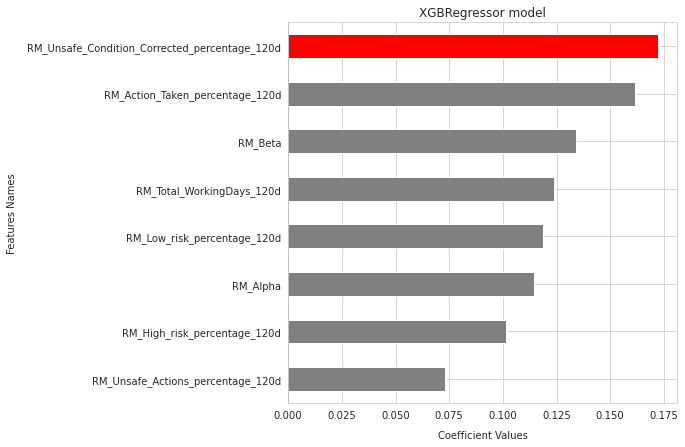

R-squared: 9.635 %
Root Mean Squared Error (RMSE): 0.233


In [322]:
# define the new model after hyperparameters tuning
tuned_XGBReg_rm = XGBRegressor(colsample_bytree=list(params.values())[0],
                                          learning_rate=list(params.values())[1],
                                          max_depth=list(params.values())[2],
                                          n_estimators=list(params.values())[3],                              
                                          random_state=13)

#fitting model
tuned_XGBReg_rm.fit(x_train_rm,y_train_rm)

#feature importance
feature_importance_trees(tuned_XGBReg_rm,x_train_rm)

#model prediction 
tuned_pred_XGBReg_rm = tuned_XGBReg_rm.predict(x_test_rm)

#model evaluation with hyperparameter tuned 
r2_score_tuned_XGBReg_rm = tuned_XGBReg_rm.score(x_test_rm,y_test_rm)
print("R-squared:",round(r2_score_tuned_XGBReg_rm*100,3),'%')
RMSE_tuned_XGBReg_rm = round(np.sqrt(mean_squared_error(y_test_rm,tuned_pred_XGBReg_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_XGBReg_rm)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [323]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor RM',
                                   'r2_score_tuned_XGBReg_rm',r2_score_tuned_XGBReg_rm)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor RM',
                                   'RMSE_tuned_XGBReg_rm',RMSE_tuned_XGBReg_rm)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


In [324]:
rm_evaluation = df_evaluation_score[df_evaluation_score['Model'].str.endswith('RM')]
rm_r2 = rm_evaluation[rm_evaluation['Evaluation_Name'].str.startswith('r2')]
rm_RMSE = rm_evaluation[rm_evaluation['Evaluation_Name'].str.startswith('RMSE')]

rm_evaluation
#rm_r2.iloc[rm_r2['score'].idxmax()].values
rm_r2.loc[rm_r2['score'] == rm_r2['score'].max()]
rm_RMSE.loc[rm_RMSE['score'] == rm_RMSE['score'].min()]


,Model,Evaluation_Name,score
12,Linear Regression RM,r2_score_linreg_rm,-0.119148
13,Linear Regression RM,RMSE_linreg_rm,0.259000
14,Ridge Regression RM,r2_score_ridge_rm,-0.119062
15,Ridge Regression RM,RMSE_ridge_rm,0.259000
16,Tuned Ridge Regression RM,r2_score_ridge_rm_cv,-0.052726
17,Tuned Ridge Regression RM,RMSE_ridge_rm_cv,0.251000
18,Lasso Regression RM,r2_score_lasso_rm,0.023424
19,Lasso Regression RM,RMSE_lasso_rm,0.242000
20,Tuned Lasso Regression RM,r2_score_lasso_rm_cv,-0.005457
21,Tuned Lasso Regression RM,RMSE_lasso_rm_cv,0.246000


,Model,Evaluation_Name,score
32,Tuned XGBoost Regressor RM,r2_score_tuned_XGBReg_rm,0.096351


,Model,Evaluation_Name,score
29,Tuned RandomForest Regressor RM,RMSE_tuned_RandForestReg_rm,0.233
33,Tuned XGBoost Regressor RM,RMSE_tuned_XGBReg_rm,0.233


In [325]:
all_positions_evaluation = df_evaluation_score[~df_evaluation_score.Model.str.endswith('RM')]
r2 = all_positions_evaluation[all_positions_evaluation['Evaluation_Name'].str.startswith('r2')]
RMSE = all_positions_evaluation[all_positions_evaluation['Evaluation_Name'].str.startswith('RMSE')]

all_positions_evaluation
r2.loc[r2['score'] == r2['score'].max()]
RMSE.loc[RMSE['score'] == RMSE['score'].min()]


,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,-0.064649
1,Linear Regression,RMSE_linreg,0.253000
2,Linear Regression,MAE_linreg,0.198000
3,Linear Regression,MSE_linreg,0.064000
4,Ridge Regression,r2_score_ridge,-0.064590
5,Ridge Regression,RMSE_ridge,0.253000
6,Tuned Ridge Regression,r2_score_ridge_cv,-0.020778
7,Tuned Ridge Regression,RMSE_ridge_cv,0.248000
8,Lasso Regression,r2_score_lasso,0.047750
9,Lasso Regression,RMSE_lasso,0.239000


,Model,Evaluation_Name,score
26,Tuned RandomForest Regressor,r2_score_tuned_RandForestReg,0.26644


,Model,Evaluation_Name,score
27,Tuned RandomForest Regressor,RMSE_tuned_RandForestReg,0.21


## Voting Regressor for all positions <a class="anchor" id="section12"></a>

Apart form Grid Search, another way to fine-tune the models is to combine the ones which performed better. Therefore, the voting regressor tends to perform better.

In [326]:
from sklearn.ensemble import VotingRegressor

# current models
reg1 = linreg
reg2 = ridge_cv
reg3 = lasso_cv
reg4 = tuned_TreeReg
reg5 = tuned_RandForestReg
reg6 = tuned_XGBReg
    
#voting regressor model   
vregressor = VotingRegressor([("lr", linreg), ("rg", ridge_cv), 
                              ("ls", lasso_cv), ("tr", tuned_TreeReg),
                              ("rf", tuned_RandForestReg),
                              ("xgb", tuned_XGBReg)])

#fit the model 
vregressor.fit(x_train, y_train)    
    
#model prediction 
pred_voting = vregressor.predict(x_test)


# r2_score_voting = vregressor.score(x_test,y_test)
# print("R-squared:",round(r2_score_voting*100,3),'%')
RMSE_voting = round(np.sqrt(mean_squared_error(y_test,pred_voting)),3)
print("Root Mean Squared Error (RMSE):",RMSE_voting)

#model evaluation with hyperparameter tuned 
for regressor, label in zip([reg1, reg2, reg3, reg4, reg5, reg6, vregressor], 
                            ['Linear Regression', 'Ridge','Lasso', 
                             'Decision Tree', 'Random Forest','XGBoost', 
                             'Voting Regressor']):
    scores = regressor.score(x_test,y_test)
    print("R-squared: %0.3f [%s]" % (scores*100, label))


    
    
    

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rg',
                             RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]),
                                     cv=5)),
                            ('ls',
                             LassoCV(cv=5, max_iter=10000, random_state=13)),
                            ('tr',
                             DecisionTreeRegressor(max_depth=3,
                                                   max_features='auto',
                                                   min_weight_fraction_leaf=0.2,
                                                   random_state=13,
                                                   splitter='random')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   max_fe...
                                          eval_metric=None, gamma=0, gpu_id=-1,
                         

Root Mean Squared Error (RMSE): 0.227
R-squared: -6.465 [Linear Regression]
R-squared: -2.078 [Ridge]
R-squared: 4.188 [Lasso]
R-squared: 17.766 [Decision Tree]
R-squared: 26.644 [Random Forest]
R-squared: 18.187 [XGBoost]
R-squared: 14.509 [Voting Regressor]


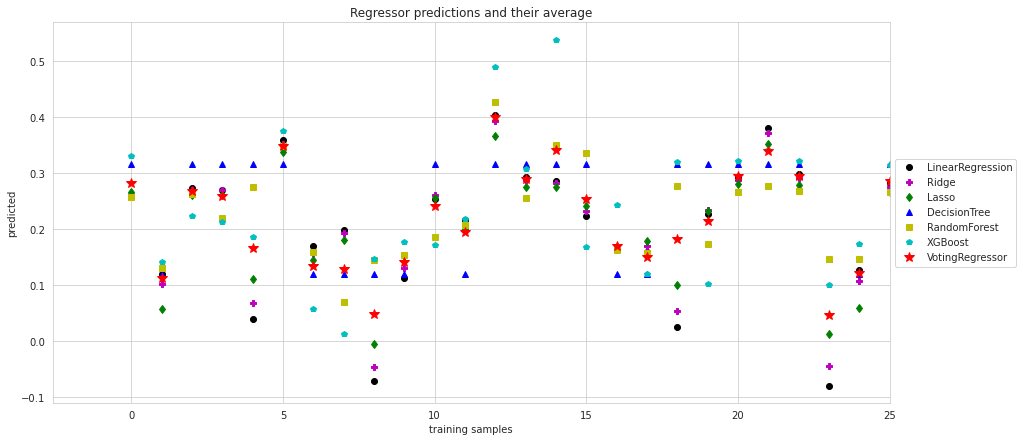

In [327]:
plt.figure(figsize =(15, 7))
plt.plot(pred_linreg, "ko", label="LinearRegression")
plt.plot(pred_ridge_cv, "mP", label="Ridge")
plt.plot(pred_lasso_cv, "gd", label="Lasso")
plt.plot(tuned_pred_TreeReg, "b^", label="DecisionTree")
plt.plot(tuned_pred_RandForestReg, "ys", label="RandomForest")
plt.plot(tuned_pred_XGBReg, "cp", label="XGBoost")
plt.plot(pred_voting, "r*", ms=10, label="VotingRegressor")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True)
plt.ylabel("predicted")
plt.xlabel("training samples")
#plt.legend(loc="right")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(right=25)
plt.title("Regressor predictions and their average")

plt.show();

Above is a visualisation of the 25 first predictions. The red stars demonstrate the average prediction made by the Voting Regressor. We can observe that the two models with the best results are both Random Forest and Decision Tree.

## Voting Regressor with Rig Managers Data only <a class="anchor" id="section13"></a>


In [328]:
from sklearn.ensemble import VotingRegressor

# current models
reg1 = linreg_rm
reg2 = ridge_rm_cv
reg3 = lasso_rm
reg4 = tuned_TreeReg_rm
reg5 = tuned_RandForestReg_rm
reg6 = tuned_XGBReg_rm
    
#voting regressor model   
vregressor_rm = VotingRegressor([("lr", linreg_rm), ("rg", ridge_rm_cv), 
                                 ("ls", lasso_rm), ("tr", tuned_TreeReg_rm),
                                 ("rf", tuned_RandForestReg_rm), 
                                 ("xgb", tuned_XGBReg)])

#fit the model 
vregressor_rm.fit(x_train_rm, y_train_rm)    
    
#model prediction 
pred_voting_rm = vregressor_rm.predict(x_test_rm)

# r2_score_voting_rm = vregressor_rm.score(x_test_rm,y_test_rm)
# print("R-squared:",round(r2_score_voting_rm*100,3),'%')
RMSE_voting_rm = round(np.sqrt(mean_squared_error(y_test_rm,pred_voting_rm)),3)
print("Root Mean Squared Error (RMSE):",RMSE_voting_rm)

#model evaluation with hyperparameter tuned 
for regressor_rm, label in zip([reg1, reg2, reg3, reg4, reg5, reg6, vregressor_rm], 
                            ['Linear Regression RM', 'Tuned Ridge RM','Lasso RM', 
                             'Tuned Decision Tree RM', 'Tuned Random Forest RM', 'Tuned XGBoost RM', 
                             'Voting Regressor RM']):
    scores_rm = regressor_rm.score(x_test_rm,y_test_rm)
    print("R-squared: %0.3f [%s]" % (scores_rm*100, label))
    

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rg',
                             RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]),
                                     cv=5)),
                            ('ls', Lasso(alpha=0.01)),
                            ('tr',
                             DecisionTreeRegressor(max_depth=3,
                                                   max_features='log2',
                                                   min_weight_fraction_leaf=0.1,
                                                   random_state=13,
                                                   splitter='random')),
                            ('rf',
                             RandomForestRegressor(bootstrap=False,
                                                   max_features='sqrt',
                                                   min_sample...
                                          eval_metric=None, gamma=0, gpu_id=-1,
    

Root Mean Squared Error (RMSE): 0.236
R-squared: -11.915 [Linear Regression RM]
R-squared: -5.273 [Tuned Ridge RM]
R-squared: 2.342 [Lasso RM]
R-squared: 5.993 [Tuned Decision Tree RM]
R-squared: 9.521 [Tuned Random Forest RM]
R-squared: 9.635 [Tuned XGBoost RM]
R-squared: 7.107 [Voting Regressor RM]


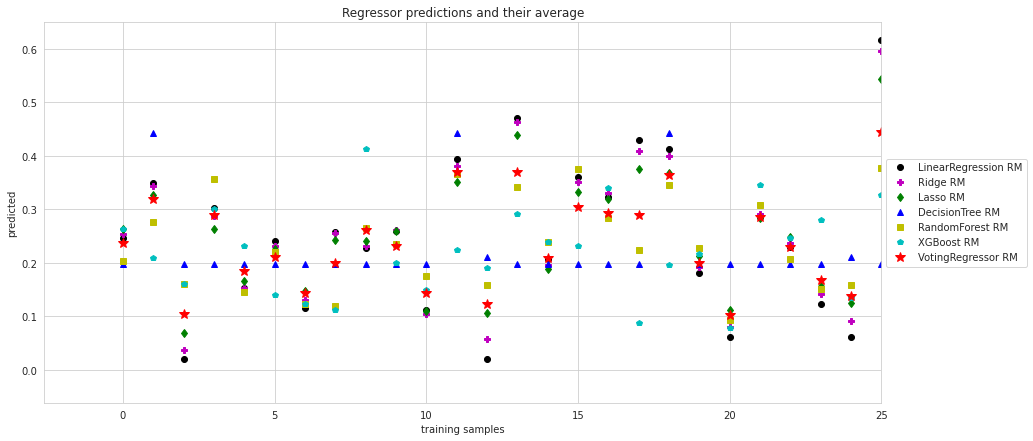

In [329]:
plt.figure(figsize =(15, 7))
plt.plot(pred_linreg_rm, "ko", label="LinearRegression RM")
plt.plot(pred_ridge_rm_cv, "mP", label="Ridge RM")
plt.plot(pred_lasso_rm, "gd", label="Lasso RM")
plt.plot(tuned_pred_TreeReg_rm, "b^", label="DecisionTree RM")
plt.plot(tuned_pred_RandForestReg_rm, "ys", label="RandomForest RM")
plt.plot(tuned_pred_XGBReg_rm, "cp", label="XGBoost RM")
plt.plot(pred_voting_rm, "r*", ms=10, label="VotingRegressor RM")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True)
plt.ylabel("predicted")
plt.xlabel("training samples")
#plt.legend(loc="right")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(right=25)
plt.title("Regressor predictions and their average")

plt.show();

From above graph, we can see that there is a mix regarding the best performing models for the dataset with only rig managers data but the majority seems to be Linear Regression, Random Forest and XGBoost models. 

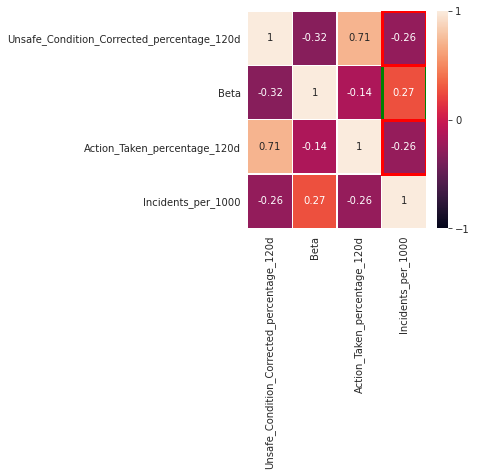

In [345]:
nat = df[[ "Unsafe_Condition_Corrected_percentage_120d","Beta","Action_Taken_percentage_120d","Incidents_per_1000"]]
#"Low_risk_percentage_120d"
from matplotlib.patches import Rectangle

corrMatrix = nat.corr()
plt.figure(figsize=(4, 4))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.4, vmin=-1, vmax=1)

coordinates = [(3,1)]
for coordinate in coordinates:
    ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "green", lw = 3))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1.0, 0, 1.0])
plt.tick_params(bottom = False, left = False)

coordinates_n = [(3,0),(3,2)]
for coordinate in coordinates_n:
    ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "red", lw = 3))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1.0, 0, 1.0])
plt.tick_params(bottom = False, left = False)

plt.show();


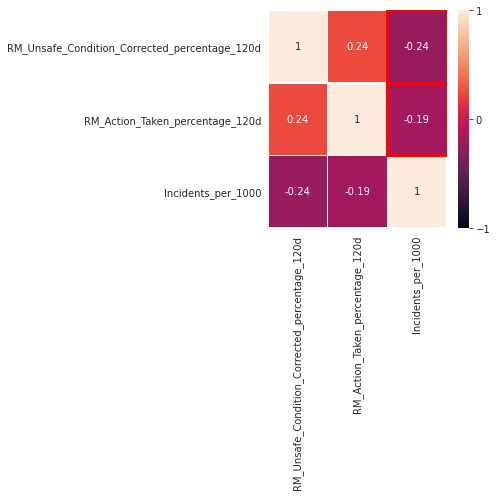

In [349]:
mar = df_rm[[ "RM_Unsafe_Condition_Corrected_percentage_120d","RM_Action_Taken_percentage_120d","Incidents_per_1000"]]
#"Low_risk_percentage_120d"
from matplotlib.patches import Rectangle

corrMatrix = mar.corr()
plt.figure(figsize=(4, 4))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.4, vmin=-1, vmax=1)

# coordinates = [(2,1)]
# for coordinate in coordinates:
#     ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "green", lw = 3))
# colorbar = ax.collections[0].colorbar
# colorbar.set_ticks([-1.0, 0, 1.0])
# plt.tick_params(bottom = False, left = False)

coordinates_n = [(3,0),(2,0),(2,1)]
for coordinate in coordinates_n:
    ax.add_patch(Rectangle(coordinate, 1, 1, fill = False, edgecolor = "red", lw = 3))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([-1.0, 0, 1.0])
plt.tick_params(bottom = False, left = False)

plt.show();
